<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Example:-Mushroom-Classification" data-toc-modified-id="First-Example:-Mushroom-Classification-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Example: Mushroom Classification</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries and Data</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Classification</a></span></li><li><span><a href="#Final-Report" data-toc-modified-id="Final-Report-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Final Report</a></span></li></ul></li><li><span><a href="#Second-Example:-Market-Response-Model" data-toc-modified-id="Second-Example:-Market-Response-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Second Example: Market Response Model</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-Data" data-toc-modified-id="Importing-Libraries-and-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Libraries and Data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Skew-of-univariate-distribution" data-toc-modified-id="Skew-of-univariate-distribution-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Skew of univariate distribution</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Correlation</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Split Data</a></span></li></ul></li><li><span><a href="#Model-creation" data-toc-modified-id="Model-creation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Model creation</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning-with-Optuna" data-toc-modified-id="Hyperparameter-tuning-with-Optuna-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Hyperparameter tuning with Optuna</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></div>

# First Example: Mushroom Classification

## Importing Libraries and Data

In [1]:
import plotly.express as px
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, scale
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from catboost import CatBoostClassifier

import os
for dirname, _, filenames in os.walk('J:\java\Kaggle\Mushroom_Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

J:\java\Kaggle\Mushroom_Classification\archive.zip
J:\java\Kaggle\Mushroom_Classification\mushrooms.csv
J:\java\Kaggle\Mushroom_Classification\Mushroom_Classification.ipynb
J:\java\Kaggle\Mushroom_Classification\poisonous-or-edible-mushroom-classification.ipynb
J:\java\Kaggle\Mushroom_Classification\.ipynb_checkpoints\Mushroom_Classification-checkpoint.ipynb
J:\java\Kaggle\Mushroom_Classification\catboost_info\catboost_training.json
J:\java\Kaggle\Mushroom_Classification\catboost_info\learn_error.tsv
J:\java\Kaggle\Mushroom_Classification\catboost_info\time_left.tsv
J:\java\Kaggle\Mushroom_Classification\catboost_info\learn\events.out.tfevents


In [2]:
df = pd.read_csv('J:\java\Kaggle\Mushroom_Classification\mushrooms.csv')

In [5]:
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data Analysis

First, we will start off by analyzing some features to obtain insights.

In [42]:
column_names = df[["cap-shape", 'cap-surface', 'odor','population','habitat']]

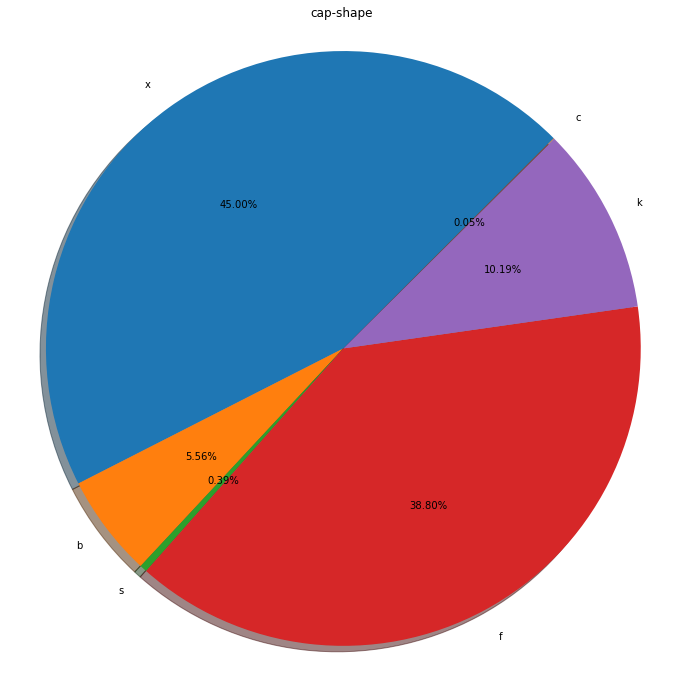

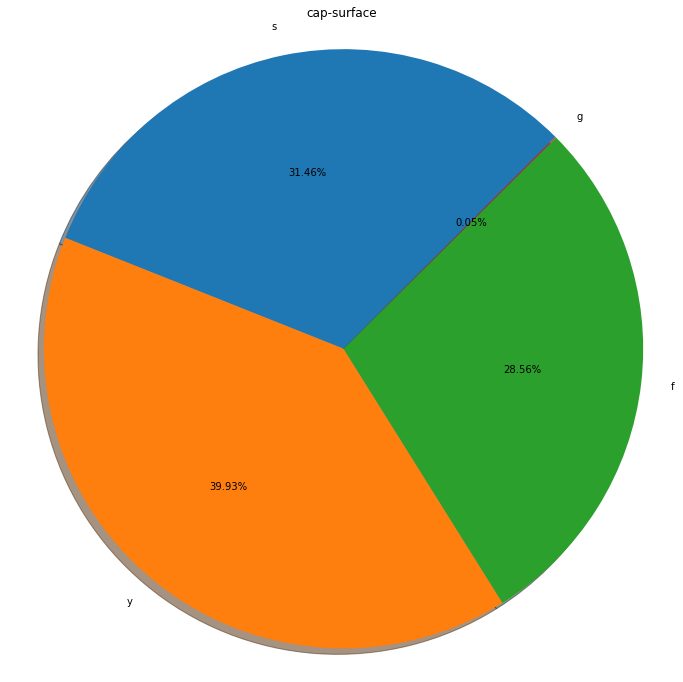

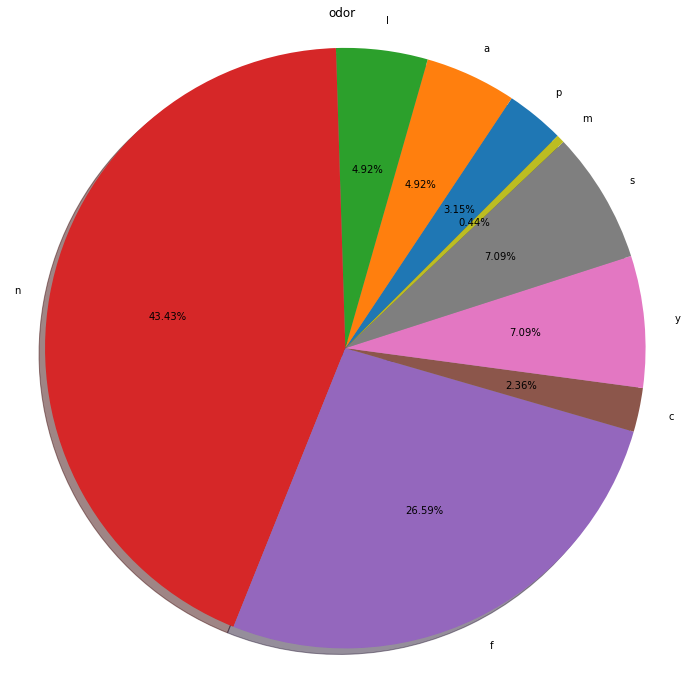

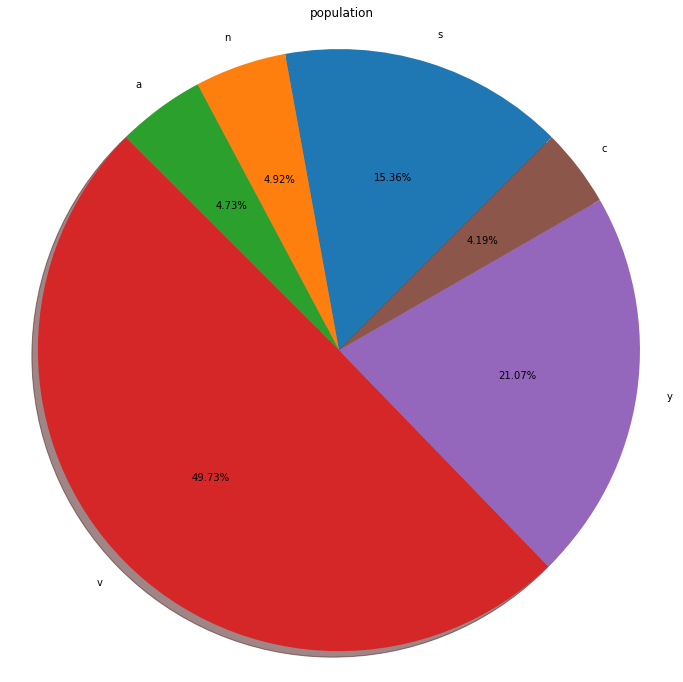

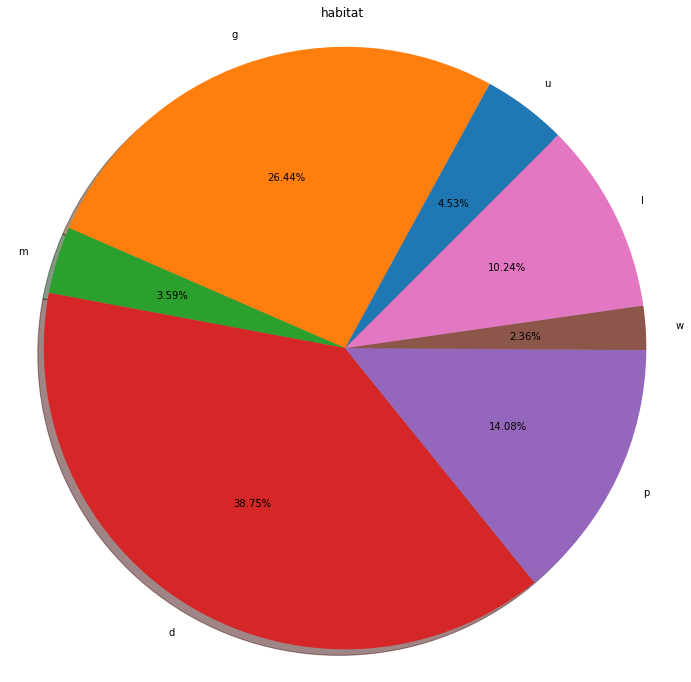

In [48]:
for key, value in column_names.items():
    fig, ax = plt.subplots(figsize=(12, 12))
    labels = key
    col = value.unique()

    count = Counter(df[labels])
    ax.pie(count.values(), labels=col, shadow=True, autopct=lambda p:f'{p:.2f}%', startangle = 45)
    ax.set_title(labels)
    ax.axis('equal')
    plt.show()

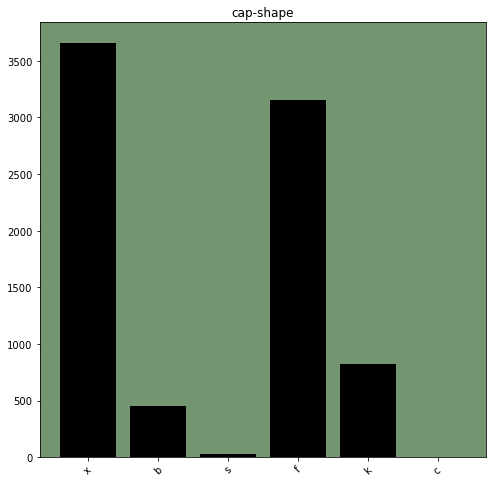

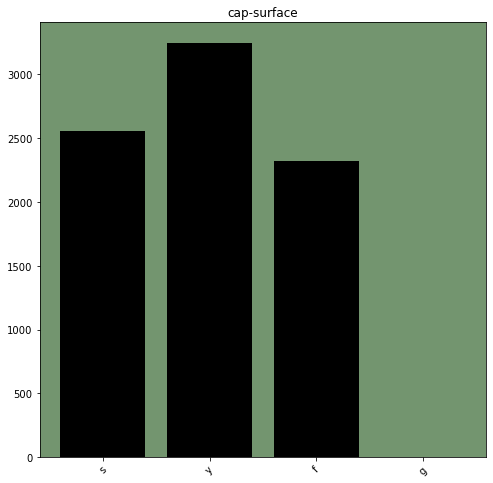

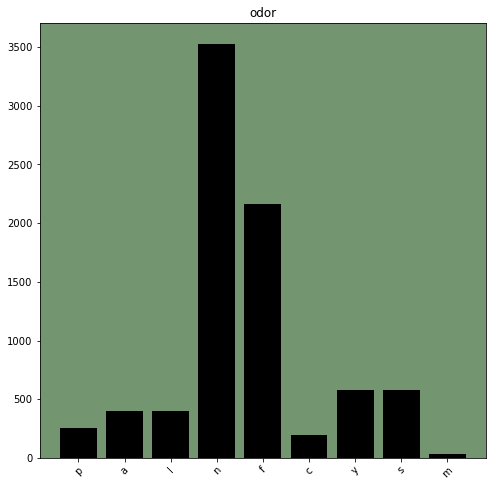

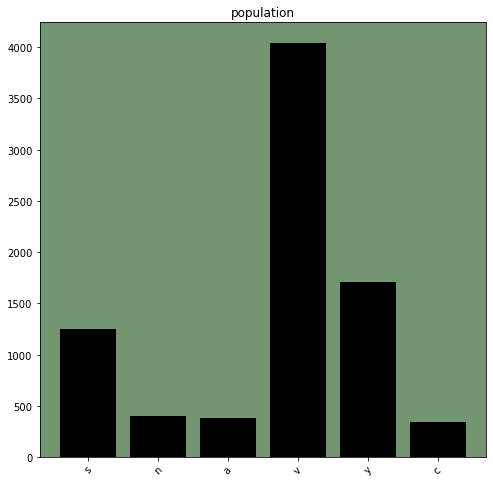

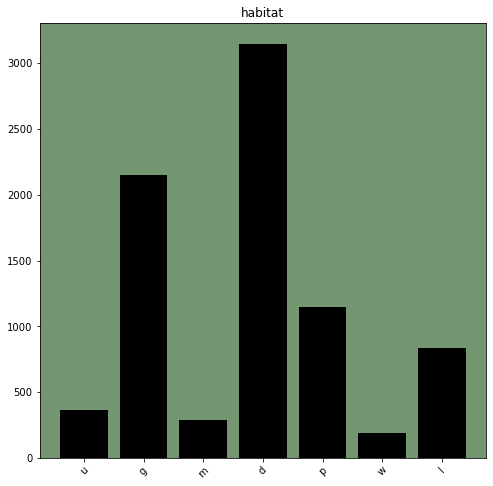

In [49]:
for key, value in column_names.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    labels = key
    col = value.unique()
    
    count = Counter(df[labels])
    ax.bar(col, count.values(), color = "black")
    ax.set_title(labels)
    ax.set_facecolor('#73956F')
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering

In [50]:
binary_classes = ["class","bruises", "gill-size", "stalk-shape", "veil-type"]
binary_excluded = df.drop(binary_classes, axis = 1)
df_one_hot = pd.get_dummies(binary_excluded)

In [51]:
binary_only = df[binary_classes]
for col in binary_only:
    lbe = LabelEncoder()
    binary_only[col] = lbe.fit_transform(binary_only[col])

<ipython-input-51-66f5a919bdf6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_copy = pd.concat([df_one_hot, binary_only], axis=1)
df_all = df.copy()
for col in df:
    lbe = LabelEncoder()
    df_all[col] = lbe.fit_transform(df[col])

In [54]:
X_classification = df_copy.drop('class', axis=1)
y_classification = df_copy['class']

In [55]:
X = df_all.drop('class', axis=1)
y = df_all['class']

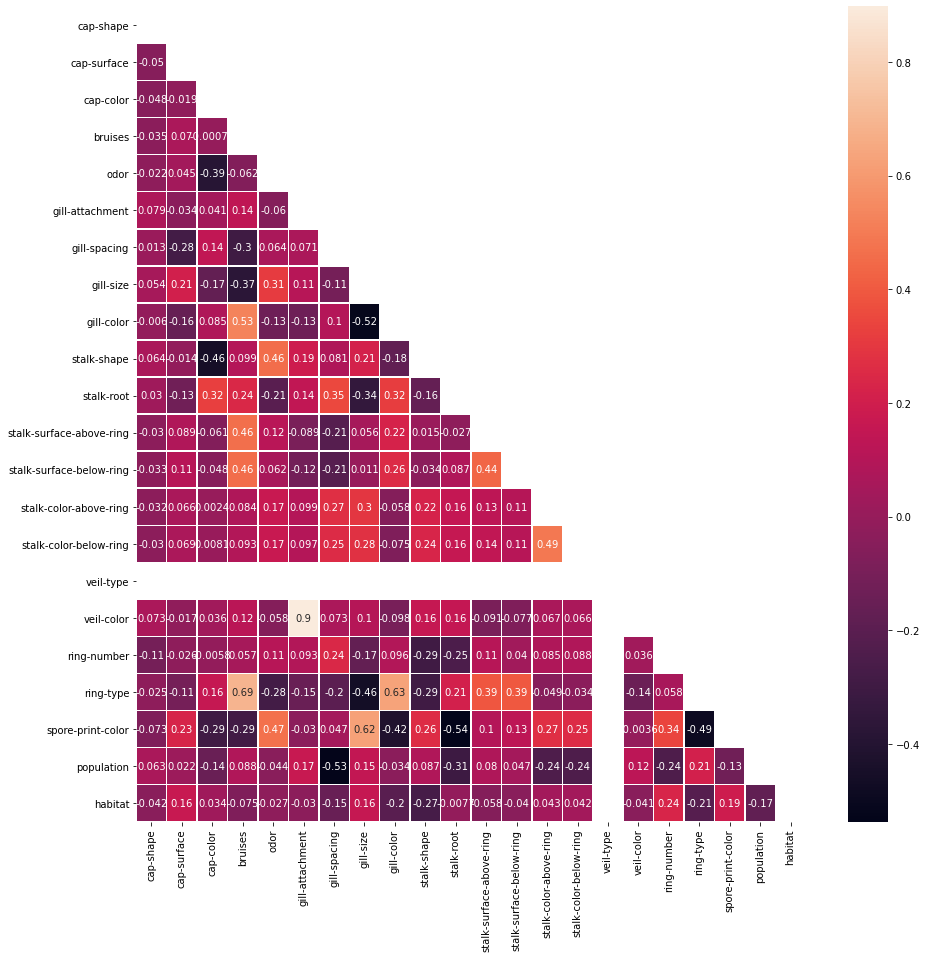

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mask = np.zeros_like(X.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), annot=True, linewidths = 0.5, mask=mask)
plt.show()

X_classification = X_classification.drop('veil-type', axis=1)

Now that we obtain insight into data we can create our prediction models to classify mushrooms.

## Classification

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [59]:
# KNN 
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [60]:
cross_val = cross_val_score(knn_model, X_test, y_test).mean()
cross_val

0.9987692307692309

In [61]:
# SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Tune model
svc_params = {'C': np.arange(0,100,1),  
              #'gamma': np.arange(0,100,1), 
              'kernel': ['rbf',"linear"]}

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


J:\java\Python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [nan nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]



GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [62]:
print("The best parameters of SVC: " + str(svc_cv_model.best_params_))

The best parameters of SVC: {'C': 1, 'kernel': 'rbf'}


In [63]:
svc_tuned = SVC(kernel = "rbf", C = 1).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))

cross_val = cross_val_score(svc_tuned, X_test, y_test).mean()
print(cross_val)

1.0
0.9987692307692309


In [64]:
# Random Forest
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

cross_val = cross_val_score(rf_model, X_test, y_test).mean()
cross_val

0.9987692307692309

In [65]:
#XGB
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

cross_val = cross_val_score(xgb_model, X_test, y_test).mean()
print(cross_val)

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
[16:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:56:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9993846153846153


In [66]:
#Catboost
cat_model = CatBoostClassifier().fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

cross_val = cross_val_score(cat_model, X_test, y_test, verbose= 0).mean()
print(cross_val)

Learning rate set to 0.02291
0:	learn: 0.6462161	total: 252ms	remaining: 4m 12s
1:	learn: 0.5739067	total: 265ms	remaining: 2m 12s
2:	learn: 0.5222411	total: 275ms	remaining: 1m 31s
3:	learn: 0.4692254	total: 281ms	remaining: 1m 9s
4:	learn: 0.4260599	total: 286ms	remaining: 57s
5:	learn: 0.3867136	total: 292ms	remaining: 48.4s
6:	learn: 0.3503332	total: 298ms	remaining: 42.3s
7:	learn: 0.3183317	total: 304ms	remaining: 37.7s
8:	learn: 0.2909653	total: 308ms	remaining: 34s
9:	learn: 0.2620218	total: 313ms	remaining: 30.9s
10:	learn: 0.2365814	total: 317ms	remaining: 28.5s
11:	learn: 0.2162184	total: 321ms	remaining: 26.4s
12:	learn: 0.1991703	total: 325ms	remaining: 24.7s
13:	learn: 0.1775357	total: 329ms	remaining: 23.2s
14:	learn: 0.1642212	total: 333ms	remaining: 21.9s
15:	learn: 0.1458171	total: 337ms	remaining: 20.7s
16:	learn: 0.1335025	total: 341ms	remaining: 19.7s
17:	learn: 0.1222439	total: 345ms	remaining: 18.8s
18:	learn: 0.1121183	total: 350ms	remaining: 18s
19:	learn: 0.10

164:	learn: 0.0041020	total: 946ms	remaining: 4.79s
165:	learn: 0.0040624	total: 951ms	remaining: 4.78s
166:	learn: 0.0040151	total: 955ms	remaining: 4.76s
167:	learn: 0.0040151	total: 959ms	remaining: 4.75s
168:	learn: 0.0040104	total: 964ms	remaining: 4.74s
169:	learn: 0.0039921	total: 970ms	remaining: 4.74s
170:	learn: 0.0039921	total: 974ms	remaining: 4.72s
171:	learn: 0.0038571	total: 978ms	remaining: 4.71s
172:	learn: 0.0038382	total: 983ms	remaining: 4.7s
173:	learn: 0.0037908	total: 988ms	remaining: 4.69s
174:	learn: 0.0037326	total: 992ms	remaining: 4.68s
175:	learn: 0.0037153	total: 997ms	remaining: 4.67s
176:	learn: 0.0037153	total: 1s	remaining: 4.66s
177:	learn: 0.0037153	total: 1s	remaining: 4.63s
178:	learn: 0.0037153	total: 1.01s	remaining: 4.62s
179:	learn: 0.0037025	total: 1.01s	remaining: 4.61s
180:	learn: 0.0036968	total: 1.02s	remaining: 4.6s
181:	learn: 0.0036492	total: 1.02s	remaining: 4.59s
182:	learn: 0.0036252	total: 1.02s	remaining: 4.57s
183:	learn: 0.003602

344:	learn: 0.0014523	total: 1.65s	remaining: 3.14s
345:	learn: 0.0014523	total: 1.66s	remaining: 3.13s
346:	learn: 0.0014523	total: 1.66s	remaining: 3.13s
347:	learn: 0.0014523	total: 1.66s	remaining: 3.12s
348:	learn: 0.0014460	total: 1.67s	remaining: 3.11s
349:	learn: 0.0014366	total: 1.67s	remaining: 3.11s
350:	learn: 0.0014285	total: 1.68s	remaining: 3.1s
351:	learn: 0.0014285	total: 1.68s	remaining: 3.09s
352:	learn: 0.0014222	total: 1.68s	remaining: 3.09s
353:	learn: 0.0014222	total: 1.69s	remaining: 3.08s
354:	learn: 0.0014222	total: 1.69s	remaining: 3.07s
355:	learn: 0.0014222	total: 1.69s	remaining: 3.06s
356:	learn: 0.0014116	total: 1.7s	remaining: 3.06s
357:	learn: 0.0014116	total: 1.7s	remaining: 3.05s
358:	learn: 0.0014116	total: 1.7s	remaining: 3.04s
359:	learn: 0.0014089	total: 1.71s	remaining: 3.03s
360:	learn: 0.0014089	total: 1.71s	remaining: 3.03s
361:	learn: 0.0014028	total: 1.71s	remaining: 3.02s
362:	learn: 0.0014028	total: 1.72s	remaining: 3.01s
363:	learn: 0.00

543:	learn: 0.0012200	total: 2.35s	remaining: 1.97s
544:	learn: 0.0012200	total: 2.35s	remaining: 1.96s
545:	learn: 0.0012200	total: 2.35s	remaining: 1.96s
546:	learn: 0.0012200	total: 2.36s	remaining: 1.95s
547:	learn: 0.0012200	total: 2.36s	remaining: 1.95s
548:	learn: 0.0012200	total: 2.37s	remaining: 1.94s
549:	learn: 0.0012200	total: 2.37s	remaining: 1.94s
550:	learn: 0.0012200	total: 2.37s	remaining: 1.94s
551:	learn: 0.0012200	total: 2.38s	remaining: 1.93s
552:	learn: 0.0012200	total: 2.38s	remaining: 1.93s
553:	learn: 0.0012200	total: 2.38s	remaining: 1.92s
554:	learn: 0.0012200	total: 2.39s	remaining: 1.92s
555:	learn: 0.0012200	total: 2.39s	remaining: 1.91s
556:	learn: 0.0012200	total: 2.4s	remaining: 1.91s
557:	learn: 0.0012200	total: 2.4s	remaining: 1.9s
558:	learn: 0.0012200	total: 2.4s	remaining: 1.9s
559:	learn: 0.0012200	total: 2.4s	remaining: 1.89s
560:	learn: 0.0012200	total: 2.41s	remaining: 1.88s
561:	learn: 0.0012200	total: 2.41s	remaining: 1.88s
562:	learn: 0.0012

721:	learn: 0.0012200	total: 3.05s	remaining: 1.17s
722:	learn: 0.0012200	total: 3.05s	remaining: 1.17s
723:	learn: 0.0012200	total: 3.06s	remaining: 1.17s
724:	learn: 0.0012200	total: 3.06s	remaining: 1.16s
725:	learn: 0.0012200	total: 3.07s	remaining: 1.16s
726:	learn: 0.0012200	total: 3.07s	remaining: 1.15s
727:	learn: 0.0012200	total: 3.07s	remaining: 1.15s
728:	learn: 0.0012200	total: 3.08s	remaining: 1.14s
729:	learn: 0.0012200	total: 3.08s	remaining: 1.14s
730:	learn: 0.0012200	total: 3.09s	remaining: 1.14s
731:	learn: 0.0012200	total: 3.09s	remaining: 1.13s
732:	learn: 0.0012200	total: 3.1s	remaining: 1.13s
733:	learn: 0.0012200	total: 3.1s	remaining: 1.12s
734:	learn: 0.0012200	total: 3.1s	remaining: 1.12s
735:	learn: 0.0012200	total: 3.11s	remaining: 1.11s
736:	learn: 0.0012200	total: 3.11s	remaining: 1.11s
737:	learn: 0.0012200	total: 3.11s	remaining: 1.1s
738:	learn: 0.0012200	total: 3.12s	remaining: 1.1s
739:	learn: 0.0012200	total: 3.12s	remaining: 1.1s
740:	learn: 0.0012

889:	learn: 0.0012199	total: 3.75s	remaining: 463ms
890:	learn: 0.0012199	total: 3.75s	remaining: 459ms
891:	learn: 0.0012199	total: 3.76s	remaining: 455ms
892:	learn: 0.0012199	total: 3.76s	remaining: 451ms
893:	learn: 0.0012199	total: 3.77s	remaining: 446ms
894:	learn: 0.0012199	total: 3.77s	remaining: 442ms
895:	learn: 0.0012199	total: 3.77s	remaining: 438ms
896:	learn: 0.0012199	total: 3.78s	remaining: 434ms
897:	learn: 0.0012199	total: 3.78s	remaining: 430ms
898:	learn: 0.0012199	total: 3.79s	remaining: 425ms
899:	learn: 0.0012199	total: 3.79s	remaining: 421ms
900:	learn: 0.0012199	total: 3.8s	remaining: 417ms
901:	learn: 0.0012199	total: 3.8s	remaining: 413ms
902:	learn: 0.0012199	total: 3.8s	remaining: 409ms
903:	learn: 0.0012199	total: 3.81s	remaining: 404ms
904:	learn: 0.0012199	total: 3.81s	remaining: 400ms
905:	learn: 0.0012199	total: 3.82s	remaining: 396ms
906:	learn: 0.0012199	total: 3.82s	remaining: 392ms
907:	learn: 0.0012199	total: 3.83s	remaining: 388ms
908:	learn: 0.0

52:	learn: 0.0910441	total: 162ms	remaining: 2.89s
53:	learn: 0.0878759	total: 165ms	remaining: 2.88s
54:	learn: 0.0856959	total: 167ms	remaining: 2.87s
55:	learn: 0.0826722	total: 170ms	remaining: 2.86s
56:	learn: 0.0800526	total: 172ms	remaining: 2.85s
57:	learn: 0.0780190	total: 175ms	remaining: 2.84s
58:	learn: 0.0757325	total: 177ms	remaining: 2.83s
59:	learn: 0.0736393	total: 179ms	remaining: 2.81s
60:	learn: 0.0712692	total: 182ms	remaining: 2.8s
61:	learn: 0.0699514	total: 184ms	remaining: 2.78s
62:	learn: 0.0680009	total: 187ms	remaining: 2.78s
63:	learn: 0.0662072	total: 189ms	remaining: 2.77s
64:	learn: 0.0640929	total: 192ms	remaining: 2.76s
65:	learn: 0.0625244	total: 194ms	remaining: 2.75s
66:	learn: 0.0607939	total: 196ms	remaining: 2.73s
67:	learn: 0.0588548	total: 199ms	remaining: 2.72s
68:	learn: 0.0571506	total: 201ms	remaining: 2.71s
69:	learn: 0.0558305	total: 204ms	remaining: 2.7s
70:	learn: 0.0542745	total: 206ms	remaining: 2.69s
71:	learn: 0.0529141	total: 208ms

270:	learn: 0.0124794	total: 672ms	remaining: 1.81s
271:	learn: 0.0124490	total: 675ms	remaining: 1.8s
272:	learn: 0.0124413	total: 677ms	remaining: 1.8s
273:	learn: 0.0123923	total: 680ms	remaining: 1.8s
274:	learn: 0.0123862	total: 682ms	remaining: 1.8s
275:	learn: 0.0123838	total: 683ms	remaining: 1.79s
276:	learn: 0.0122796	total: 686ms	remaining: 1.79s
277:	learn: 0.0121851	total: 689ms	remaining: 1.79s
278:	learn: 0.0120222	total: 691ms	remaining: 1.78s
279:	learn: 0.0119415	total: 693ms	remaining: 1.78s
280:	learn: 0.0119390	total: 695ms	remaining: 1.78s
281:	learn: 0.0119367	total: 697ms	remaining: 1.77s
282:	learn: 0.0118696	total: 699ms	remaining: 1.77s
283:	learn: 0.0118674	total: 701ms	remaining: 1.77s
284:	learn: 0.0117989	total: 703ms	remaining: 1.76s
285:	learn: 0.0116628	total: 706ms	remaining: 1.76s
286:	learn: 0.0116065	total: 708ms	remaining: 1.76s
287:	learn: 0.0115333	total: 710ms	remaining: 1.75s
288:	learn: 0.0114882	total: 712ms	remaining: 1.75s
289:	learn: 0.01

504:	learn: 0.0051869	total: 1.18s	remaining: 1.16s
505:	learn: 0.0051609	total: 1.18s	remaining: 1.15s
506:	learn: 0.0051583	total: 1.18s	remaining: 1.15s
507:	learn: 0.0051538	total: 1.19s	remaining: 1.15s
508:	learn: 0.0051504	total: 1.19s	remaining: 1.15s
509:	learn: 0.0050954	total: 1.19s	remaining: 1.15s
510:	learn: 0.0050954	total: 1.19s	remaining: 1.14s
511:	learn: 0.0050417	total: 1.2s	remaining: 1.14s
512:	learn: 0.0050023	total: 1.2s	remaining: 1.14s
513:	learn: 0.0049998	total: 1.2s	remaining: 1.14s
514:	learn: 0.0049922	total: 1.2s	remaining: 1.13s
515:	learn: 0.0049716	total: 1.21s	remaining: 1.13s
516:	learn: 0.0049698	total: 1.21s	remaining: 1.13s
517:	learn: 0.0049515	total: 1.21s	remaining: 1.13s
518:	learn: 0.0049492	total: 1.21s	remaining: 1.12s
519:	learn: 0.0049338	total: 1.22s	remaining: 1.12s
520:	learn: 0.0049335	total: 1.22s	remaining: 1.12s
521:	learn: 0.0049034	total: 1.22s	remaining: 1.12s
522:	learn: 0.0049024	total: 1.22s	remaining: 1.11s
523:	learn: 0.00

738:	learn: 0.0033732	total: 1.69s	remaining: 595ms
739:	learn: 0.0033732	total: 1.69s	remaining: 593ms
740:	learn: 0.0033732	total: 1.69s	remaining: 590ms
741:	learn: 0.0033732	total: 1.69s	remaining: 588ms
742:	learn: 0.0033732	total: 1.69s	remaining: 586ms
743:	learn: 0.0033732	total: 1.7s	remaining: 584ms
744:	learn: 0.0033686	total: 1.7s	remaining: 582ms
745:	learn: 0.0033643	total: 1.7s	remaining: 580ms
746:	learn: 0.0033601	total: 1.7s	remaining: 577ms
747:	learn: 0.0033601	total: 1.71s	remaining: 575ms
748:	learn: 0.0033589	total: 1.71s	remaining: 573ms
749:	learn: 0.0033547	total: 1.71s	remaining: 571ms
750:	learn: 0.0033371	total: 1.72s	remaining: 569ms
751:	learn: 0.0033371	total: 1.72s	remaining: 566ms
752:	learn: 0.0033366	total: 1.72s	remaining: 564ms
753:	learn: 0.0033366	total: 1.72s	remaining: 562ms
754:	learn: 0.0033358	total: 1.72s	remaining: 560ms
755:	learn: 0.0033358	total: 1.73s	remaining: 557ms
756:	learn: 0.0033346	total: 1.73s	remaining: 555ms
757:	learn: 0.00

982:	learn: 0.0030271	total: 2.19s	remaining: 37.8ms
983:	learn: 0.0030271	total: 2.19s	remaining: 35.6ms
984:	learn: 0.0030271	total: 2.19s	remaining: 33.3ms
985:	learn: 0.0030271	total: 2.19s	remaining: 31.1ms
986:	learn: 0.0030271	total: 2.19s	remaining: 28.9ms
987:	learn: 0.0030271	total: 2.19s	remaining: 26.7ms
988:	learn: 0.0030267	total: 2.2s	remaining: 24.4ms
989:	learn: 0.0030267	total: 2.2s	remaining: 22.2ms
990:	learn: 0.0030267	total: 2.2s	remaining: 20ms
991:	learn: 0.0030265	total: 2.2s	remaining: 17.8ms
992:	learn: 0.0030265	total: 2.2s	remaining: 15.5ms
993:	learn: 0.0030265	total: 2.21s	remaining: 13.3ms
994:	learn: 0.0030262	total: 2.21s	remaining: 11.1ms
995:	learn: 0.0030262	total: 2.21s	remaining: 8.87ms
996:	learn: 0.0030262	total: 2.21s	remaining: 6.66ms
997:	learn: 0.0030262	total: 2.21s	remaining: 4.44ms
998:	learn: 0.0030262	total: 2.21s	remaining: 2.22ms
999:	learn: 0.0030262	total: 2.22s	remaining: 0us
Learning rate set to 0.011524
0:	learn: 0.6723072	total:

215:	learn: 0.0149204	total: 501ms	remaining: 1.82s
216:	learn: 0.0149133	total: 504ms	remaining: 1.82s
217:	learn: 0.0149079	total: 506ms	remaining: 1.81s
218:	learn: 0.0149023	total: 509ms	remaining: 1.81s
219:	learn: 0.0148986	total: 510ms	remaining: 1.81s
220:	learn: 0.0148621	total: 513ms	remaining: 1.81s
221:	learn: 0.0148579	total: 515ms	remaining: 1.8s
222:	learn: 0.0147726	total: 517ms	remaining: 1.8s
223:	learn: 0.0147066	total: 520ms	remaining: 1.8s
224:	learn: 0.0145866	total: 522ms	remaining: 1.8s
225:	learn: 0.0145792	total: 525ms	remaining: 1.8s
226:	learn: 0.0145151	total: 527ms	remaining: 1.79s
227:	learn: 0.0145108	total: 528ms	remaining: 1.79s
228:	learn: 0.0144086	total: 531ms	remaining: 1.79s
229:	learn: 0.0144029	total: 533ms	remaining: 1.78s
230:	learn: 0.0143972	total: 535ms	remaining: 1.78s
231:	learn: 0.0143583	total: 538ms	remaining: 1.78s
232:	learn: 0.0142401	total: 540ms	remaining: 1.78s
233:	learn: 0.0142367	total: 542ms	remaining: 1.77s
234:	learn: 0.014

439:	learn: 0.0063134	total: 1.01s	remaining: 1.28s
440:	learn: 0.0063134	total: 1.01s	remaining: 1.28s
441:	learn: 0.0062681	total: 1.01s	remaining: 1.28s
442:	learn: 0.0062230	total: 1.01s	remaining: 1.28s
443:	learn: 0.0062225	total: 1.02s	remaining: 1.27s
444:	learn: 0.0061913	total: 1.02s	remaining: 1.27s
445:	learn: 0.0061863	total: 1.02s	remaining: 1.27s
446:	learn: 0.0061858	total: 1.02s	remaining: 1.26s
447:	learn: 0.0061851	total: 1.02s	remaining: 1.26s
448:	learn: 0.0061744	total: 1.03s	remaining: 1.26s
449:	learn: 0.0061740	total: 1.03s	remaining: 1.26s
450:	learn: 0.0061494	total: 1.03s	remaining: 1.26s
451:	learn: 0.0061299	total: 1.04s	remaining: 1.26s
452:	learn: 0.0061233	total: 1.04s	remaining: 1.25s
453:	learn: 0.0061228	total: 1.04s	remaining: 1.25s
454:	learn: 0.0061118	total: 1.04s	remaining: 1.25s
455:	learn: 0.0061118	total: 1.04s	remaining: 1.25s
456:	learn: 0.0061081	total: 1.05s	remaining: 1.24s
457:	learn: 0.0060929	total: 1.05s	remaining: 1.24s
458:	learn: 

672:	learn: 0.0037074	total: 1.51s	remaining: 736ms
673:	learn: 0.0037074	total: 1.52s	remaining: 734ms
674:	learn: 0.0037036	total: 1.52s	remaining: 732ms
675:	learn: 0.0037032	total: 1.52s	remaining: 730ms
676:	learn: 0.0036945	total: 1.52s	remaining: 728ms
677:	learn: 0.0036736	total: 1.53s	remaining: 726ms
678:	learn: 0.0036669	total: 1.53s	remaining: 724ms
679:	learn: 0.0036668	total: 1.54s	remaining: 723ms
680:	learn: 0.0036652	total: 1.54s	remaining: 721ms
681:	learn: 0.0036572	total: 1.54s	remaining: 719ms
682:	learn: 0.0036499	total: 1.54s	remaining: 717ms
683:	learn: 0.0036386	total: 1.55s	remaining: 715ms
684:	learn: 0.0036337	total: 1.55s	remaining: 713ms
685:	learn: 0.0036314	total: 1.55s	remaining: 711ms
686:	learn: 0.0036281	total: 1.55s	remaining: 709ms
687:	learn: 0.0036045	total: 1.56s	remaining: 707ms
688:	learn: 0.0035995	total: 1.56s	remaining: 705ms
689:	learn: 0.0035896	total: 1.56s	remaining: 703ms
690:	learn: 0.0035896	total: 1.56s	remaining: 700ms
691:	learn: 

832:	learn: 0.0029162	total: 1.85s	remaining: 371ms
833:	learn: 0.0029026	total: 1.85s	remaining: 369ms
834:	learn: 0.0029024	total: 1.85s	remaining: 367ms
835:	learn: 0.0029020	total: 1.86s	remaining: 364ms
836:	learn: 0.0028949	total: 1.86s	remaining: 362ms
837:	learn: 0.0028946	total: 1.86s	remaining: 360ms
838:	learn: 0.0028946	total: 1.86s	remaining: 357ms
839:	learn: 0.0028943	total: 1.86s	remaining: 355ms
840:	learn: 0.0028941	total: 1.86s	remaining: 353ms
841:	learn: 0.0028941	total: 1.87s	remaining: 350ms
842:	learn: 0.0028807	total: 1.87s	remaining: 348ms
843:	learn: 0.0028804	total: 1.87s	remaining: 346ms
844:	learn: 0.0028658	total: 1.87s	remaining: 344ms
845:	learn: 0.0028658	total: 1.88s	remaining: 341ms
846:	learn: 0.0028658	total: 1.88s	remaining: 339ms
847:	learn: 0.0028658	total: 1.88s	remaining: 337ms
848:	learn: 0.0028658	total: 1.88s	remaining: 334ms
849:	learn: 0.0028658	total: 1.88s	remaining: 332ms
850:	learn: 0.0028655	total: 1.88s	remaining: 330ms
851:	learn: 

Learning rate set to 0.011524
0:	learn: 0.6643495	total: 2.36ms	remaining: 2.36s
1:	learn: 0.6373274	total: 4.78ms	remaining: 2.39s
2:	learn: 0.6155403	total: 7.2ms	remaining: 2.39s
3:	learn: 0.5911529	total: 9.51ms	remaining: 2.37s
4:	learn: 0.5688342	total: 12ms	remaining: 2.39s
5:	learn: 0.5460914	total: 14.4ms	remaining: 2.38s
6:	learn: 0.5239000	total: 16.3ms	remaining: 2.31s
7:	learn: 0.4992033	total: 18.6ms	remaining: 2.31s
8:	learn: 0.4840883	total: 20.6ms	remaining: 2.27s
9:	learn: 0.4637896	total: 23.1ms	remaining: 2.28s
10:	learn: 0.4469779	total: 25.5ms	remaining: 2.29s
11:	learn: 0.4343520	total: 27.8ms	remaining: 2.29s
12:	learn: 0.4200687	total: 30.2ms	remaining: 2.29s
13:	learn: 0.4057485	total: 32.5ms	remaining: 2.29s
14:	learn: 0.3885142	total: 34.8ms	remaining: 2.29s
15:	learn: 0.3759525	total: 37.2ms	remaining: 2.29s
16:	learn: 0.3625257	total: 39.6ms	remaining: 2.29s
17:	learn: 0.3481857	total: 41.9ms	remaining: 2.28s
18:	learn: 0.3341861	total: 44.1ms	remaining: 2

216:	learn: 0.0070580	total: 501ms	remaining: 1.81s
217:	learn: 0.0070353	total: 504ms	remaining: 1.81s
218:	learn: 0.0069970	total: 506ms	remaining: 1.8s
219:	learn: 0.0069634	total: 509ms	remaining: 1.8s
220:	learn: 0.0069222	total: 511ms	remaining: 1.8s
221:	learn: 0.0068808	total: 514ms	remaining: 1.8s
222:	learn: 0.0068471	total: 516ms	remaining: 1.8s
223:	learn: 0.0068354	total: 519ms	remaining: 1.8s
224:	learn: 0.0068213	total: 521ms	remaining: 1.79s
225:	learn: 0.0067573	total: 524ms	remaining: 1.79s
226:	learn: 0.0067232	total: 526ms	remaining: 1.79s
227:	learn: 0.0066985	total: 528ms	remaining: 1.79s
228:	learn: 0.0066020	total: 530ms	remaining: 1.79s
229:	learn: 0.0066020	total: 532ms	remaining: 1.78s
230:	learn: 0.0065855	total: 534ms	remaining: 1.78s
231:	learn: 0.0065686	total: 536ms	remaining: 1.77s
232:	learn: 0.0065022	total: 539ms	remaining: 1.77s
233:	learn: 0.0064677	total: 541ms	remaining: 1.77s
234:	learn: 0.0064166	total: 543ms	remaining: 1.77s
235:	learn: 0.0063

444:	learn: 0.0035299	total: 1s	remaining: 1.25s
445:	learn: 0.0035146	total: 1.01s	remaining: 1.25s
446:	learn: 0.0035146	total: 1.01s	remaining: 1.25s
447:	learn: 0.0035146	total: 1.01s	remaining: 1.25s
448:	learn: 0.0035146	total: 1.01s	remaining: 1.25s
449:	learn: 0.0035079	total: 1.02s	remaining: 1.24s
450:	learn: 0.0034958	total: 1.02s	remaining: 1.24s
451:	learn: 0.0034958	total: 1.02s	remaining: 1.24s
452:	learn: 0.0034844	total: 1.03s	remaining: 1.24s
453:	learn: 0.0034665	total: 1.03s	remaining: 1.24s
454:	learn: 0.0034495	total: 1.03s	remaining: 1.24s
455:	learn: 0.0034431	total: 1.03s	remaining: 1.23s
456:	learn: 0.0034379	total: 1.04s	remaining: 1.23s
457:	learn: 0.0034379	total: 1.04s	remaining: 1.23s
458:	learn: 0.0034283	total: 1.04s	remaining: 1.23s
459:	learn: 0.0034233	total: 1.04s	remaining: 1.22s
460:	learn: 0.0034233	total: 1.04s	remaining: 1.22s
461:	learn: 0.0034178	total: 1.05s	remaining: 1.22s
462:	learn: 0.0033747	total: 1.05s	remaining: 1.22s
463:	learn: 0.0

668:	learn: 0.0026303	total: 1.5s	remaining: 743ms
669:	learn: 0.0026303	total: 1.5s	remaining: 741ms
670:	learn: 0.0026291	total: 1.51s	remaining: 739ms
671:	learn: 0.0026291	total: 1.51s	remaining: 736ms
672:	learn: 0.0026257	total: 1.51s	remaining: 734ms
673:	learn: 0.0026257	total: 1.51s	remaining: 732ms
674:	learn: 0.0026253	total: 1.51s	remaining: 730ms
675:	learn: 0.0026202	total: 1.52s	remaining: 728ms
676:	learn: 0.0026202	total: 1.52s	remaining: 725ms
677:	learn: 0.0026194	total: 1.52s	remaining: 723ms
678:	learn: 0.0026193	total: 1.52s	remaining: 721ms
679:	learn: 0.0026152	total: 1.53s	remaining: 719ms
680:	learn: 0.0026037	total: 1.53s	remaining: 717ms
681:	learn: 0.0026037	total: 1.53s	remaining: 715ms
682:	learn: 0.0026034	total: 1.53s	remaining: 712ms
683:	learn: 0.0026025	total: 1.54s	remaining: 710ms
684:	learn: 0.0025968	total: 1.54s	remaining: 708ms
685:	learn: 0.0025965	total: 1.54s	remaining: 706ms
686:	learn: 0.0025900	total: 1.54s	remaining: 704ms
687:	learn: 0.

912:	learn: 0.0020412	total: 2s	remaining: 190ms
913:	learn: 0.0020412	total: 2s	remaining: 188ms
914:	learn: 0.0020410	total: 2s	remaining: 186ms
915:	learn: 0.0020409	total: 2s	remaining: 183ms
916:	learn: 0.0020409	total: 2s	remaining: 181ms
917:	learn: 0.0020409	total: 2s	remaining: 179ms
918:	learn: 0.0020407	total: 2s	remaining: 177ms
919:	learn: 0.0020407	total: 2.01s	remaining: 174ms
920:	learn: 0.0020407	total: 2.01s	remaining: 172ms
921:	learn: 0.0020407	total: 2.01s	remaining: 170ms
922:	learn: 0.0020326	total: 2.01s	remaining: 168ms
923:	learn: 0.0020326	total: 2.01s	remaining: 166ms
924:	learn: 0.0020326	total: 2.02s	remaining: 163ms
925:	learn: 0.0020325	total: 2.02s	remaining: 161ms
926:	learn: 0.0020325	total: 2.02s	remaining: 159ms
927:	learn: 0.0020324	total: 2.02s	remaining: 157ms
928:	learn: 0.0020321	total: 2.02s	remaining: 154ms
929:	learn: 0.0020320	total: 2.02s	remaining: 152ms
930:	learn: 0.0020319	total: 2.02s	remaining: 150ms
931:	learn: 0.0020318	total: 2.02

72:	learn: 0.0553749	total: 167ms	remaining: 2.12s
73:	learn: 0.0537325	total: 169ms	remaining: 2.12s
74:	learn: 0.0520879	total: 172ms	remaining: 2.12s
75:	learn: 0.0507535	total: 174ms	remaining: 2.12s
76:	learn: 0.0494316	total: 177ms	remaining: 2.12s
77:	learn: 0.0482379	total: 180ms	remaining: 2.12s
78:	learn: 0.0470504	total: 182ms	remaining: 2.12s
79:	learn: 0.0459887	total: 184ms	remaining: 2.12s
80:	learn: 0.0449714	total: 187ms	remaining: 2.12s
81:	learn: 0.0439712	total: 189ms	remaining: 2.12s
82:	learn: 0.0434033	total: 191ms	remaining: 2.11s
83:	learn: 0.0428662	total: 194ms	remaining: 2.11s
84:	learn: 0.0420093	total: 196ms	remaining: 2.11s
85:	learn: 0.0414246	total: 198ms	remaining: 2.1s
86:	learn: 0.0405825	total: 200ms	remaining: 2.1s
87:	learn: 0.0398514	total: 203ms	remaining: 2.1s
88:	learn: 0.0391573	total: 205ms	remaining: 2.1s
89:	learn: 0.0386852	total: 207ms	remaining: 2.09s
90:	learn: 0.0381786	total: 209ms	remaining: 2.09s
91:	learn: 0.0379707	total: 211ms	r

294:	learn: 0.0095132	total: 670ms	remaining: 1.6s
295:	learn: 0.0094049	total: 673ms	remaining: 1.6s
296:	learn: 0.0093924	total: 675ms	remaining: 1.6s
297:	learn: 0.0093707	total: 677ms	remaining: 1.59s
298:	learn: 0.0092234	total: 680ms	remaining: 1.59s
299:	learn: 0.0091952	total: 682ms	remaining: 1.59s
300:	learn: 0.0091515	total: 685ms	remaining: 1.59s
301:	learn: 0.0091446	total: 687ms	remaining: 1.59s
302:	learn: 0.0091434	total: 688ms	remaining: 1.58s
303:	learn: 0.0091350	total: 691ms	remaining: 1.58s
304:	learn: 0.0091338	total: 692ms	remaining: 1.58s
305:	learn: 0.0090923	total: 694ms	remaining: 1.57s
306:	learn: 0.0090062	total: 697ms	remaining: 1.57s
307:	learn: 0.0089712	total: 699ms	remaining: 1.57s
308:	learn: 0.0088950	total: 701ms	remaining: 1.57s
309:	learn: 0.0088202	total: 704ms	remaining: 1.56s
310:	learn: 0.0088003	total: 706ms	remaining: 1.56s
311:	learn: 0.0087319	total: 708ms	remaining: 1.56s
312:	learn: 0.0086963	total: 711ms	remaining: 1.56s
313:	learn: 0.0

512:	learn: 0.0042297	total: 1.18s	remaining: 1.12s
513:	learn: 0.0042266	total: 1.18s	remaining: 1.12s
514:	learn: 0.0042046	total: 1.18s	remaining: 1.11s
515:	learn: 0.0041952	total: 1.19s	remaining: 1.11s
516:	learn: 0.0041728	total: 1.19s	remaining: 1.11s
517:	learn: 0.0041654	total: 1.19s	remaining: 1.11s
518:	learn: 0.0041654	total: 1.19s	remaining: 1.1s
519:	learn: 0.0041611	total: 1.19s	remaining: 1.1s
520:	learn: 0.0041366	total: 1.2s	remaining: 1.1s
521:	learn: 0.0041320	total: 1.2s	remaining: 1.1s
522:	learn: 0.0041176	total: 1.2s	remaining: 1.09s
523:	learn: 0.0041069	total: 1.2s	remaining: 1.09s
524:	learn: 0.0041069	total: 1.2s	remaining: 1.09s
525:	learn: 0.0040927	total: 1.21s	remaining: 1.09s
526:	learn: 0.0040918	total: 1.21s	remaining: 1.08s
527:	learn: 0.0040768	total: 1.21s	remaining: 1.08s
528:	learn: 0.0040664	total: 1.21s	remaining: 1.08s
529:	learn: 0.0040360	total: 1.22s	remaining: 1.08s
530:	learn: 0.0040247	total: 1.22s	remaining: 1.07s
531:	learn: 0.0040167

672:	learn: 0.0028017	total: 1.52s	remaining: 739ms
673:	learn: 0.0027984	total: 1.52s	remaining: 737ms
674:	learn: 0.0027946	total: 1.52s	remaining: 735ms
675:	learn: 0.0027946	total: 1.53s	remaining: 732ms
676:	learn: 0.0027864	total: 1.53s	remaining: 730ms
677:	learn: 0.0027810	total: 1.53s	remaining: 728ms
678:	learn: 0.0027777	total: 1.53s	remaining: 726ms
679:	learn: 0.0027616	total: 1.54s	remaining: 724ms
680:	learn: 0.0027505	total: 1.54s	remaining: 722ms
681:	learn: 0.0027505	total: 1.54s	remaining: 719ms
682:	learn: 0.0027465	total: 1.54s	remaining: 717ms
683:	learn: 0.0027430	total: 1.55s	remaining: 715ms
684:	learn: 0.0027311	total: 1.55s	remaining: 713ms
685:	learn: 0.0027298	total: 1.55s	remaining: 710ms
686:	learn: 0.0027232	total: 1.55s	remaining: 708ms
687:	learn: 0.0027023	total: 1.56s	remaining: 706ms
688:	learn: 0.0026972	total: 1.56s	remaining: 703ms
689:	learn: 0.0026972	total: 1.56s	remaining: 701ms
690:	learn: 0.0026941	total: 1.56s	remaining: 699ms
691:	learn: 

883:	learn: 0.0020652	total: 2.02s	remaining: 265ms
884:	learn: 0.0020631	total: 2.02s	remaining: 263ms
885:	learn: 0.0020540	total: 2.02s	remaining: 260ms
886:	learn: 0.0020540	total: 2.03s	remaining: 258ms
887:	learn: 0.0020451	total: 2.03s	remaining: 256ms
888:	learn: 0.0020451	total: 2.03s	remaining: 254ms
889:	learn: 0.0020363	total: 2.03s	remaining: 251ms
890:	learn: 0.0020342	total: 2.04s	remaining: 249ms
891:	learn: 0.0020321	total: 2.04s	remaining: 247ms
892:	learn: 0.0020301	total: 2.04s	remaining: 245ms
893:	learn: 0.0020252	total: 2.04s	remaining: 242ms
894:	learn: 0.0020165	total: 2.05s	remaining: 240ms
895:	learn: 0.0020145	total: 2.05s	remaining: 238ms
896:	learn: 0.0020145	total: 2.05s	remaining: 235ms
897:	learn: 0.0020125	total: 2.05s	remaining: 233ms
898:	learn: 0.0020104	total: 2.06s	remaining: 231ms
899:	learn: 0.0020104	total: 2.06s	remaining: 229ms
900:	learn: 0.0020104	total: 2.06s	remaining: 226ms
901:	learn: 0.0020084	total: 2.06s	remaining: 224ms
902:	learn: 

71:	learn: 0.0562493	total: 186ms	remaining: 2.4s
72:	learn: 0.0548717	total: 189ms	remaining: 2.4s
73:	learn: 0.0535057	total: 191ms	remaining: 2.39s
74:	learn: 0.0522690	total: 194ms	remaining: 2.39s
75:	learn: 0.0510291	total: 196ms	remaining: 2.39s
76:	learn: 0.0495369	total: 199ms	remaining: 2.39s
77:	learn: 0.0479888	total: 202ms	remaining: 2.39s
78:	learn: 0.0469741	total: 204ms	remaining: 2.38s
79:	learn: 0.0456069	total: 207ms	remaining: 2.38s
80:	learn: 0.0446518	total: 209ms	remaining: 2.37s
81:	learn: 0.0435995	total: 211ms	remaining: 2.36s
82:	learn: 0.0425296	total: 214ms	remaining: 2.36s
83:	learn: 0.0419682	total: 216ms	remaining: 2.36s
84:	learn: 0.0408529	total: 219ms	remaining: 2.35s
85:	learn: 0.0398166	total: 221ms	remaining: 2.35s
86:	learn: 0.0389074	total: 223ms	remaining: 2.34s
87:	learn: 0.0380464	total: 226ms	remaining: 2.34s
88:	learn: 0.0375430	total: 228ms	remaining: 2.33s
89:	learn: 0.0370925	total: 230ms	remaining: 2.33s
90:	learn: 0.0363546	total: 233ms

290:	learn: 0.0114187	total: 683ms	remaining: 1.66s
291:	learn: 0.0113371	total: 686ms	remaining: 1.66s
292:	learn: 0.0113258	total: 688ms	remaining: 1.66s
293:	learn: 0.0112830	total: 691ms	remaining: 1.66s
294:	learn: 0.0111668	total: 695ms	remaining: 1.66s
295:	learn: 0.0111307	total: 699ms	remaining: 1.66s
296:	learn: 0.0110936	total: 702ms	remaining: 1.66s
297:	learn: 0.0110094	total: 704ms	remaining: 1.66s
298:	learn: 0.0109207	total: 707ms	remaining: 1.66s
299:	learn: 0.0108177	total: 710ms	remaining: 1.66s
300:	learn: 0.0107879	total: 714ms	remaining: 1.66s
301:	learn: 0.0106709	total: 716ms	remaining: 1.66s
302:	learn: 0.0104921	total: 719ms	remaining: 1.65s
303:	learn: 0.0104610	total: 721ms	remaining: 1.65s
304:	learn: 0.0103608	total: 724ms	remaining: 1.65s
305:	learn: 0.0102155	total: 726ms	remaining: 1.65s
306:	learn: 0.0102122	total: 729ms	remaining: 1.64s
307:	learn: 0.0101680	total: 731ms	remaining: 1.64s
308:	learn: 0.0101357	total: 733ms	remaining: 1.64s
309:	learn: 

471:	learn: 0.0058119	total: 1.18s	remaining: 1.32s
472:	learn: 0.0057665	total: 1.19s	remaining: 1.32s
473:	learn: 0.0057564	total: 1.19s	remaining: 1.32s
474:	learn: 0.0057541	total: 1.19s	remaining: 1.32s
475:	learn: 0.0057541	total: 1.19s	remaining: 1.31s
476:	learn: 0.0057534	total: 1.2s	remaining: 1.31s
477:	learn: 0.0057527	total: 1.2s	remaining: 1.31s
478:	learn: 0.0056581	total: 1.2s	remaining: 1.31s
479:	learn: 0.0056481	total: 1.21s	remaining: 1.31s
480:	learn: 0.0056244	total: 1.21s	remaining: 1.3s
481:	learn: 0.0056227	total: 1.21s	remaining: 1.3s
482:	learn: 0.0056224	total: 1.21s	remaining: 1.3s
483:	learn: 0.0055967	total: 1.22s	remaining: 1.3s
484:	learn: 0.0055937	total: 1.22s	remaining: 1.3s
485:	learn: 0.0055799	total: 1.22s	remaining: 1.29s
486:	learn: 0.0055519	total: 1.23s	remaining: 1.29s
487:	learn: 0.0055059	total: 1.23s	remaining: 1.29s
488:	learn: 0.0055017	total: 1.23s	remaining: 1.29s
489:	learn: 0.0055012	total: 1.24s	remaining: 1.28s
490:	learn: 0.005501

667:	learn: 0.0039058	total: 1.67s	remaining: 829ms
668:	learn: 0.0038980	total: 1.67s	remaining: 827ms
669:	learn: 0.0038903	total: 1.67s	remaining: 825ms
670:	learn: 0.0038903	total: 1.68s	remaining: 822ms
671:	learn: 0.0038679	total: 1.68s	remaining: 820ms
672:	learn: 0.0038564	total: 1.68s	remaining: 818ms
673:	learn: 0.0038564	total: 1.69s	remaining: 815ms
674:	learn: 0.0038559	total: 1.69s	remaining: 813ms
675:	learn: 0.0038035	total: 1.69s	remaining: 810ms
676:	learn: 0.0038035	total: 1.69s	remaining: 808ms
677:	learn: 0.0038032	total: 1.7s	remaining: 805ms
678:	learn: 0.0038032	total: 1.7s	remaining: 803ms
679:	learn: 0.0038032	total: 1.7s	remaining: 801ms
680:	learn: 0.0037969	total: 1.71s	remaining: 799ms
681:	learn: 0.0037969	total: 1.71s	remaining: 797ms
682:	learn: 0.0037969	total: 1.71s	remaining: 795ms
683:	learn: 0.0037969	total: 1.71s	remaining: 792ms
684:	learn: 0.0037907	total: 1.72s	remaining: 790ms
685:	learn: 0.0037788	total: 1.72s	remaining: 788ms
686:	learn: 0.0

870:	learn: 0.0035524	total: 2.14s	remaining: 318ms
871:	learn: 0.0035521	total: 2.15s	remaining: 315ms
872:	learn: 0.0035519	total: 2.15s	remaining: 312ms
873:	learn: 0.0035516	total: 2.15s	remaining: 310ms
874:	learn: 0.0035513	total: 2.15s	remaining: 307ms
875:	learn: 0.0035510	total: 2.15s	remaining: 305ms
876:	learn: 0.0035507	total: 2.15s	remaining: 302ms
877:	learn: 0.0035504	total: 2.16s	remaining: 300ms
878:	learn: 0.0035501	total: 2.16s	remaining: 297ms
879:	learn: 0.0035498	total: 2.16s	remaining: 295ms
880:	learn: 0.0035496	total: 2.16s	remaining: 292ms
881:	learn: 0.0035493	total: 2.16s	remaining: 290ms
882:	learn: 0.0035490	total: 2.17s	remaining: 287ms
883:	learn: 0.0035487	total: 2.17s	remaining: 285ms
884:	learn: 0.0035485	total: 2.17s	remaining: 282ms
885:	learn: 0.0035482	total: 2.17s	remaining: 279ms
886:	learn: 0.0035479	total: 2.17s	remaining: 277ms
887:	learn: 0.0035477	total: 2.17s	remaining: 274ms
888:	learn: 0.0035475	total: 2.18s	remaining: 272ms
889:	learn: 

In [67]:
#VOTING CLASSIFIER 
from sklearn.ensemble import VotingClassifier
classifiers = [
    ('SVC', svc_tuned), 
    ('KNeighbors', knn_model), 
    ('Random Forest', rf_model),
    ('XGboost', xgb_model),
    ('Catboost', cat_model), 
]

vc = VotingClassifier(estimators = classifiers, voting = 'hard')
 
vc_model = vc.fit(X_train, y_train)
 
y_pred = vc_model.predict(X_test)
 
vc_acc = accuracy_score(y_test, y_pred)

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.02291
0:	learn: 0.6462161	total: 5.83ms	remaining: 5.82s
1:	learn: 0.5739067	total: 11.8ms	remaining: 5.89s
2:	learn: 0.5222411	total: 18.1ms	remaining: 6.02s
3:	learn: 0.4692254	total: 24ms	remaining: 5.98s
4:	learn: 0.4260599	total: 30.1ms	remaining: 5.98s
5:	learn: 0.3867136	total: 36ms	remaining: 5.97s
6:	learn: 0.3503332	total: 42ms	remaining: 5.96s
7:	learn: 0.3183317	total: 48ms	remaining: 5.95s
8:	learn: 0.2909653	total: 53.6ms	remaining: 5.9s
9:	learn: 0.2620218	total: 57.5ms	remaining: 5.7s
10:	learn: 0.2365814	total: 61.5ms	remaining: 5.53s
11:	learn: 0.2162184	total: 65.4ms	remaining: 5.38s
12:	learn: 0.1991703	total: 69.4ms	remaining: 5.27s
13:	l

167:	learn: 0.0040151	total: 692ms	remaining: 3.43s
168:	learn: 0.0040104	total: 697ms	remaining: 3.42s
169:	learn: 0.0039921	total: 701ms	remaining: 3.42s
170:	learn: 0.0039921	total: 705ms	remaining: 3.42s
171:	learn: 0.0038571	total: 711ms	remaining: 3.42s
172:	learn: 0.0038382	total: 715ms	remaining: 3.42s
173:	learn: 0.0037908	total: 729ms	remaining: 3.46s
174:	learn: 0.0037326	total: 733ms	remaining: 3.46s
175:	learn: 0.0037153	total: 738ms	remaining: 3.46s
176:	learn: 0.0037153	total: 743ms	remaining: 3.45s
177:	learn: 0.0037153	total: 745ms	remaining: 3.44s
178:	learn: 0.0037153	total: 749ms	remaining: 3.43s
179:	learn: 0.0037025	total: 754ms	remaining: 3.43s
180:	learn: 0.0036968	total: 758ms	remaining: 3.43s
181:	learn: 0.0036492	total: 762ms	remaining: 3.42s
182:	learn: 0.0036252	total: 767ms	remaining: 3.42s
183:	learn: 0.0036025	total: 772ms	remaining: 3.42s
184:	learn: 0.0036025	total: 776ms	remaining: 3.42s
185:	learn: 0.0035915	total: 781ms	remaining: 3.42s
186:	learn: 

343:	learn: 0.0014523	total: 1.39s	remaining: 2.65s
344:	learn: 0.0014523	total: 1.39s	remaining: 2.65s
345:	learn: 0.0014523	total: 1.4s	remaining: 2.64s
346:	learn: 0.0014523	total: 1.4s	remaining: 2.64s
347:	learn: 0.0014523	total: 1.41s	remaining: 2.63s
348:	learn: 0.0014460	total: 1.41s	remaining: 2.63s
349:	learn: 0.0014366	total: 1.41s	remaining: 2.63s
350:	learn: 0.0014285	total: 1.42s	remaining: 2.62s
351:	learn: 0.0014285	total: 1.42s	remaining: 2.62s
352:	learn: 0.0014222	total: 1.43s	remaining: 2.61s
353:	learn: 0.0014222	total: 1.43s	remaining: 2.61s
354:	learn: 0.0014222	total: 1.43s	remaining: 2.6s
355:	learn: 0.0014222	total: 1.44s	remaining: 2.6s
356:	learn: 0.0014116	total: 1.44s	remaining: 2.59s
357:	learn: 0.0014116	total: 1.44s	remaining: 2.59s
358:	learn: 0.0014116	total: 1.45s	remaining: 2.58s
359:	learn: 0.0014089	total: 1.45s	remaining: 2.58s
360:	learn: 0.0014089	total: 1.45s	remaining: 2.57s
361:	learn: 0.0014028	total: 1.46s	remaining: 2.57s
362:	learn: 0.00

528:	learn: 0.0012200	total: 2.09s	remaining: 1.86s
529:	learn: 0.0012200	total: 2.09s	remaining: 1.85s
530:	learn: 0.0012200	total: 2.1s	remaining: 1.85s
531:	learn: 0.0012200	total: 2.1s	remaining: 1.85s
532:	learn: 0.0012200	total: 2.1s	remaining: 1.84s
533:	learn: 0.0012200	total: 2.11s	remaining: 1.84s
534:	learn: 0.0012200	total: 2.11s	remaining: 1.83s
535:	learn: 0.0012200	total: 2.12s	remaining: 1.83s
536:	learn: 0.0012200	total: 2.12s	remaining: 1.83s
537:	learn: 0.0012200	total: 2.12s	remaining: 1.82s
538:	learn: 0.0012200	total: 2.13s	remaining: 1.82s
539:	learn: 0.0012200	total: 2.13s	remaining: 1.81s
540:	learn: 0.0012200	total: 2.13s	remaining: 1.81s
541:	learn: 0.0012200	total: 2.13s	remaining: 1.8s
542:	learn: 0.0012200	total: 2.14s	remaining: 1.8s
543:	learn: 0.0012200	total: 2.14s	remaining: 1.8s
544:	learn: 0.0012200	total: 2.15s	remaining: 1.79s
545:	learn: 0.0012200	total: 2.15s	remaining: 1.79s
546:	learn: 0.0012200	total: 2.15s	remaining: 1.78s
547:	learn: 0.0012

733:	learn: 0.0012200	total: 2.79s	remaining: 1.01s
734:	learn: 0.0012200	total: 2.8s	remaining: 1.01s
735:	learn: 0.0012200	total: 2.8s	remaining: 1s
736:	learn: 0.0012200	total: 2.81s	remaining: 1s
737:	learn: 0.0012200	total: 2.81s	remaining: 997ms
738:	learn: 0.0012200	total: 2.81s	remaining: 993ms
739:	learn: 0.0012200	total: 2.82s	remaining: 990ms
740:	learn: 0.0012200	total: 2.82s	remaining: 986ms
741:	learn: 0.0012200	total: 2.82s	remaining: 982ms
742:	learn: 0.0012200	total: 2.83s	remaining: 978ms
743:	learn: 0.0012200	total: 2.83s	remaining: 974ms
744:	learn: 0.0012200	total: 2.83s	remaining: 970ms
745:	learn: 0.0012200	total: 2.84s	remaining: 966ms
746:	learn: 0.0012200	total: 2.84s	remaining: 962ms
747:	learn: 0.0012200	total: 2.84s	remaining: 958ms
748:	learn: 0.0012200	total: 2.85s	remaining: 954ms
749:	learn: 0.0012200	total: 2.85s	remaining: 950ms
750:	learn: 0.0012200	total: 2.85s	remaining: 946ms
751:	learn: 0.0012200	total: 2.86s	remaining: 942ms
752:	learn: 0.001220

931:	learn: 0.0012199	total: 3.5s	remaining: 255ms
932:	learn: 0.0012199	total: 3.5s	remaining: 251ms
933:	learn: 0.0012199	total: 3.5s	remaining: 248ms
934:	learn: 0.0012199	total: 3.51s	remaining: 244ms
935:	learn: 0.0012199	total: 3.51s	remaining: 240ms
936:	learn: 0.0012199	total: 3.51s	remaining: 236ms
937:	learn: 0.0012199	total: 3.52s	remaining: 233ms
938:	learn: 0.0012199	total: 3.52s	remaining: 229ms
939:	learn: 0.0012199	total: 3.52s	remaining: 225ms
940:	learn: 0.0012199	total: 3.53s	remaining: 221ms
941:	learn: 0.0012199	total: 3.53s	remaining: 217ms
942:	learn: 0.0012199	total: 3.54s	remaining: 214ms
943:	learn: 0.0012199	total: 3.54s	remaining: 210ms
944:	learn: 0.0012199	total: 3.54s	remaining: 206ms
945:	learn: 0.0012199	total: 3.55s	remaining: 202ms
946:	learn: 0.0012199	total: 3.55s	remaining: 199ms
947:	learn: 0.0012199	total: 3.55s	remaining: 195ms
948:	learn: 0.0012199	total: 3.56s	remaining: 191ms
949:	learn: 0.0012199	total: 3.56s	remaining: 187ms
950:	learn: 0.0

## Final Report

In [68]:
models = [
    svc_tuned,
    knn_model,
    rf_model,
    xgb_model,
    cat_model,
    vc_model
]

accuracy = []
cross_vals = []

for model in models:
    model_names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    
    accuracy.append(acc)
    cross_vals.append(cross_val)
    
    print("-"*28)
    print(model_names + ":" )
    print("R2: {:.4%}".format(acc))
    print("Cross Validation Score: {:.4%}".format(cross_val))

----------------------------
SVC:
R2: 100.0000%
Cross Validation Score: 99.8769%
----------------------------
KNeighborsClassifier:
R2: 100.0000%
Cross Validation Score: 99.8769%
----------------------------
RandomForestClassifier:
R2: 100.0000%
Cross Validation Score: 99.8769%
[16:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----------------------------
XGBClassifier:
R2: 100.0000%
Cross Validation Score: 99.9385%
Learning rate set to 0.011524
0:	learn: 0.6710478	total: 2.84ms	remaining: 2.84s
1:	learn: 0.6439893	total: 5.74ms	remaining: 2.86s
2:	learn: 0.6204939	total: 8.86ms	remaining: 2.94s
3:	learn: 0.5976028	total: 12.1ms	remaining: 3.02s
4:	learn: 0.5748102	total: 15ms	remaining: 2.99s
5:	learn: 0.5496641	total: 18ms	remaining: 2.97s
6:	learn: 0.5267509	total: 20.9ms	remaining: 2.96s
7:	learn: 0.5041058	total: 23.8ms	remaining: 2.95s
8:	learn: 0.4870954	total: 26.8ms	remaining: 2.96s
9:	learn: 0.4668842	total: 29.7ms	remaining: 2.94s
10:	learn: 0.4541657	total: 32ms	remaining: 2.88s
11:	learn: 0.

152:	learn: 0.0217142	total: 437ms	remaining: 2.42s
153:	learn: 0.0217045	total: 439ms	remaining: 2.41s
154:	learn: 0.0216946	total: 441ms	remaining: 2.4s
155:	learn: 0.0216848	total: 444ms	remaining: 2.4s
156:	learn: 0.0216758	total: 446ms	remaining: 2.4s
157:	learn: 0.0216265	total: 449ms	remaining: 2.39s
158:	learn: 0.0215923	total: 452ms	remaining: 2.39s
159:	learn: 0.0215837	total: 454ms	remaining: 2.38s
160:	learn: 0.0215515	total: 456ms	remaining: 2.38s
161:	learn: 0.0215454	total: 457ms	remaining: 2.37s
162:	learn: 0.0215370	total: 459ms	remaining: 2.36s
163:	learn: 0.0215300	total: 461ms	remaining: 2.35s
164:	learn: 0.0213372	total: 463ms	remaining: 2.34s
165:	learn: 0.0212299	total: 466ms	remaining: 2.34s
166:	learn: 0.0209473	total: 468ms	remaining: 2.33s
167:	learn: 0.0208586	total: 470ms	remaining: 2.33s
168:	learn: 0.0207831	total: 473ms	remaining: 2.33s
169:	learn: 0.0205664	total: 476ms	remaining: 2.32s
170:	learn: 0.0205576	total: 478ms	remaining: 2.32s
171:	learn: 0.0

379:	learn: 0.0076065	total: 937ms	remaining: 1.53s
380:	learn: 0.0075249	total: 940ms	remaining: 1.53s
381:	learn: 0.0075032	total: 942ms	remaining: 1.52s
382:	learn: 0.0075022	total: 944ms	remaining: 1.52s
383:	learn: 0.0075011	total: 946ms	remaining: 1.52s
384:	learn: 0.0075001	total: 949ms	remaining: 1.51s
385:	learn: 0.0074863	total: 951ms	remaining: 1.51s
386:	learn: 0.0074536	total: 955ms	remaining: 1.51s
387:	learn: 0.0074528	total: 957ms	remaining: 1.51s
388:	learn: 0.0074293	total: 960ms	remaining: 1.51s
389:	learn: 0.0074214	total: 963ms	remaining: 1.5s
390:	learn: 0.0074185	total: 965ms	remaining: 1.5s
391:	learn: 0.0073574	total: 967ms	remaining: 1.5s
392:	learn: 0.0073467	total: 970ms	remaining: 1.5s
393:	learn: 0.0073359	total: 973ms	remaining: 1.5s
394:	learn: 0.0072937	total: 975ms	remaining: 1.49s
395:	learn: 0.0072427	total: 978ms	remaining: 1.49s
396:	learn: 0.0072420	total: 979ms	remaining: 1.49s
397:	learn: 0.0072364	total: 981ms	remaining: 1.48s
398:	learn: 0.007

611:	learn: 0.0040647	total: 1.45s	remaining: 917ms
612:	learn: 0.0040647	total: 1.45s	remaining: 914ms
613:	learn: 0.0040603	total: 1.45s	remaining: 912ms
614:	learn: 0.0040580	total: 1.45s	remaining: 909ms
615:	learn: 0.0040515	total: 1.45s	remaining: 907ms
616:	learn: 0.0040218	total: 1.46s	remaining: 905ms
617:	learn: 0.0040136	total: 1.46s	remaining: 903ms
618:	learn: 0.0040108	total: 1.46s	remaining: 900ms
619:	learn: 0.0040108	total: 1.46s	remaining: 898ms
620:	learn: 0.0040108	total: 1.47s	remaining: 895ms
621:	learn: 0.0040091	total: 1.47s	remaining: 892ms
622:	learn: 0.0039871	total: 1.47s	remaining: 890ms
623:	learn: 0.0039871	total: 1.47s	remaining: 887ms
624:	learn: 0.0039851	total: 1.48s	remaining: 885ms
625:	learn: 0.0039851	total: 1.48s	remaining: 883ms
626:	learn: 0.0039725	total: 1.48s	remaining: 881ms
627:	learn: 0.0039725	total: 1.48s	remaining: 878ms
628:	learn: 0.0039721	total: 1.48s	remaining: 876ms
629:	learn: 0.0039701	total: 1.49s	remaining: 873ms
630:	learn: 

772:	learn: 0.0033185	total: 1.79s	remaining: 525ms
773:	learn: 0.0033180	total: 1.79s	remaining: 522ms
774:	learn: 0.0033180	total: 1.79s	remaining: 520ms
775:	learn: 0.0033090	total: 1.79s	remaining: 518ms
776:	learn: 0.0033086	total: 1.79s	remaining: 515ms
777:	learn: 0.0033086	total: 1.8s	remaining: 513ms
778:	learn: 0.0033082	total: 1.8s	remaining: 510ms
779:	learn: 0.0033080	total: 1.8s	remaining: 508ms
780:	learn: 0.0033080	total: 1.8s	remaining: 506ms
781:	learn: 0.0033079	total: 1.8s	remaining: 503ms
782:	learn: 0.0033039	total: 1.81s	remaining: 501ms
783:	learn: 0.0033034	total: 1.81s	remaining: 499ms
784:	learn: 0.0033000	total: 1.81s	remaining: 496ms
785:	learn: 0.0032782	total: 1.81s	remaining: 494ms
786:	learn: 0.0032781	total: 1.82s	remaining: 492ms
787:	learn: 0.0032781	total: 1.82s	remaining: 489ms
788:	learn: 0.0032724	total: 1.82s	remaining: 487ms
789:	learn: 0.0032724	total: 1.82s	remaining: 485ms
790:	learn: 0.0032563	total: 1.82s	remaining: 482ms
791:	learn: 0.003

941:	learn: 0.0030274	total: 2.11s	remaining: 130ms
942:	learn: 0.0030274	total: 2.12s	remaining: 128ms
943:	learn: 0.0030274	total: 2.12s	remaining: 126ms
944:	learn: 0.0030274	total: 2.12s	remaining: 123ms
945:	learn: 0.0030274	total: 2.12s	remaining: 121ms
946:	learn: 0.0030274	total: 2.12s	remaining: 119ms
947:	learn: 0.0030274	total: 2.13s	remaining: 117ms
948:	learn: 0.0030274	total: 2.13s	remaining: 114ms
949:	learn: 0.0030274	total: 2.13s	remaining: 112ms
950:	learn: 0.0030274	total: 2.13s	remaining: 110ms
951:	learn: 0.0030274	total: 2.13s	remaining: 108ms
952:	learn: 0.0030273	total: 2.13s	remaining: 105ms
953:	learn: 0.0030273	total: 2.14s	remaining: 103ms
954:	learn: 0.0030271	total: 2.14s	remaining: 101ms
955:	learn: 0.0030271	total: 2.14s	remaining: 98.5ms
956:	learn: 0.0030271	total: 2.14s	remaining: 96.3ms
957:	learn: 0.0030271	total: 2.14s	remaining: 94ms
958:	learn: 0.0030271	total: 2.15s	remaining: 91.7ms
959:	learn: 0.0030271	total: 2.15s	remaining: 89.5ms
960:	lear

140:	learn: 0.0225432	total: 332ms	remaining: 2.02s
141:	learn: 0.0224518	total: 335ms	remaining: 2.02s
142:	learn: 0.0223816	total: 337ms	remaining: 2.02s
143:	learn: 0.0222383	total: 340ms	remaining: 2.02s
144:	learn: 0.0222243	total: 342ms	remaining: 2.02s
145:	learn: 0.0216600	total: 344ms	remaining: 2.01s
146:	learn: 0.0215832	total: 347ms	remaining: 2.01s
147:	learn: 0.0215169	total: 350ms	remaining: 2.01s
148:	learn: 0.0214286	total: 352ms	remaining: 2.01s
149:	learn: 0.0214120	total: 355ms	remaining: 2.01s
150:	learn: 0.0214017	total: 356ms	remaining: 2s
151:	learn: 0.0208658	total: 359ms	remaining: 2s
152:	learn: 0.0207716	total: 361ms	remaining: 2s
153:	learn: 0.0207333	total: 363ms	remaining: 1.99s
154:	learn: 0.0207226	total: 365ms	remaining: 1.99s
155:	learn: 0.0206737	total: 367ms	remaining: 1.99s
156:	learn: 0.0204596	total: 370ms	remaining: 1.99s
157:	learn: 0.0204482	total: 372ms	remaining: 1.98s
158:	learn: 0.0203857	total: 374ms	remaining: 1.98s
159:	learn: 0.0203763

300:	learn: 0.0100662	total: 678ms	remaining: 1.57s
301:	learn: 0.0100627	total: 680ms	remaining: 1.57s
302:	learn: 0.0100606	total: 682ms	remaining: 1.57s
303:	learn: 0.0100606	total: 684ms	remaining: 1.56s
304:	learn: 0.0100369	total: 686ms	remaining: 1.56s
305:	learn: 0.0100078	total: 689ms	remaining: 1.56s
306:	learn: 0.0099900	total: 691ms	remaining: 1.56s
307:	learn: 0.0099872	total: 694ms	remaining: 1.56s
308:	learn: 0.0099790	total: 696ms	remaining: 1.56s
309:	learn: 0.0099758	total: 699ms	remaining: 1.55s
310:	learn: 0.0098634	total: 702ms	remaining: 1.55s
311:	learn: 0.0098634	total: 703ms	remaining: 1.55s
312:	learn: 0.0098140	total: 705ms	remaining: 1.55s
313:	learn: 0.0097614	total: 707ms	remaining: 1.54s
314:	learn: 0.0097592	total: 710ms	remaining: 1.54s
315:	learn: 0.0097307	total: 712ms	remaining: 1.54s
316:	learn: 0.0097263	total: 715ms	remaining: 1.54s
317:	learn: 0.0096569	total: 717ms	remaining: 1.54s
318:	learn: 0.0095789	total: 719ms	remaining: 1.53s
319:	learn: 

533:	learn: 0.0047851	total: 1.18s	remaining: 1.03s
534:	learn: 0.0047730	total: 1.18s	remaining: 1.03s
535:	learn: 0.0047698	total: 1.19s	remaining: 1.03s
536:	learn: 0.0047450	total: 1.19s	remaining: 1.02s
537:	learn: 0.0047360	total: 1.19s	remaining: 1.02s
538:	learn: 0.0047249	total: 1.19s	remaining: 1.02s
539:	learn: 0.0046877	total: 1.2s	remaining: 1.02s
540:	learn: 0.0046812	total: 1.2s	remaining: 1.02s
541:	learn: 0.0046808	total: 1.2s	remaining: 1.01s
542:	learn: 0.0046720	total: 1.2s	remaining: 1.01s
543:	learn: 0.0046704	total: 1.2s	remaining: 1.01s
544:	learn: 0.0046608	total: 1.21s	remaining: 1.01s
545:	learn: 0.0046123	total: 1.21s	remaining: 1s
546:	learn: 0.0045894	total: 1.21s	remaining: 1s
547:	learn: 0.0045723	total: 1.21s	remaining: 1s
548:	learn: 0.0045678	total: 1.22s	remaining: 999ms
549:	learn: 0.0045617	total: 1.22s	remaining: 997ms
550:	learn: 0.0045533	total: 1.22s	remaining: 995ms
551:	learn: 0.0045504	total: 1.22s	remaining: 993ms
552:	learn: 0.0045396	tota

743:	learn: 0.0033054	total: 1.68s	remaining: 578ms
744:	learn: 0.0033007	total: 1.68s	remaining: 576ms
745:	learn: 0.0033007	total: 1.68s	remaining: 574ms
746:	learn: 0.0033002	total: 1.69s	remaining: 571ms
747:	learn: 0.0032998	total: 1.69s	remaining: 569ms
748:	learn: 0.0032998	total: 1.69s	remaining: 566ms
749:	learn: 0.0032993	total: 1.69s	remaining: 564ms
750:	learn: 0.0032807	total: 1.69s	remaining: 562ms
751:	learn: 0.0032778	total: 1.7s	remaining: 560ms
752:	learn: 0.0032722	total: 1.7s	remaining: 558ms
753:	learn: 0.0032694	total: 1.7s	remaining: 556ms
754:	learn: 0.0032694	total: 1.71s	remaining: 554ms
755:	learn: 0.0032610	total: 1.71s	remaining: 551ms
756:	learn: 0.0032440	total: 1.71s	remaining: 549ms
757:	learn: 0.0032435	total: 1.71s	remaining: 547ms
758:	learn: 0.0032431	total: 1.71s	remaining: 545ms
759:	learn: 0.0032421	total: 1.72s	remaining: 542ms
760:	learn: 0.0032417	total: 1.72s	remaining: 540ms
761:	learn: 0.0032388	total: 1.72s	remaining: 538ms
762:	learn: 0.0

933:	learn: 0.0028362	total: 2.01s	remaining: 142ms
934:	learn: 0.0028361	total: 2.01s	remaining: 140ms
935:	learn: 0.0028358	total: 2.02s	remaining: 138ms
936:	learn: 0.0028355	total: 2.02s	remaining: 136ms
937:	learn: 0.0028352	total: 2.02s	remaining: 133ms
938:	learn: 0.0028349	total: 2.02s	remaining: 131ms
939:	learn: 0.0028346	total: 2.02s	remaining: 129ms
940:	learn: 0.0028346	total: 2.02s	remaining: 127ms
941:	learn: 0.0028343	total: 2.02s	remaining: 125ms
942:	learn: 0.0028343	total: 2.03s	remaining: 122ms
943:	learn: 0.0028343	total: 2.03s	remaining: 120ms
944:	learn: 0.0028340	total: 2.03s	remaining: 118ms
945:	learn: 0.0028337	total: 2.03s	remaining: 116ms
946:	learn: 0.0028334	total: 2.03s	remaining: 114ms
947:	learn: 0.0028331	total: 2.03s	remaining: 112ms
948:	learn: 0.0028329	total: 2.03s	remaining: 109ms
949:	learn: 0.0028327	total: 2.04s	remaining: 107ms
950:	learn: 0.0028325	total: 2.04s	remaining: 105ms
951:	learn: 0.0028322	total: 2.04s	remaining: 103ms
952:	learn: 

148:	learn: 0.0128675	total: 336ms	remaining: 1.92s
149:	learn: 0.0127555	total: 339ms	remaining: 1.92s
150:	learn: 0.0127022	total: 341ms	remaining: 1.92s
151:	learn: 0.0124423	total: 344ms	remaining: 1.92s
152:	learn: 0.0123702	total: 346ms	remaining: 1.92s
153:	learn: 0.0121738	total: 349ms	remaining: 1.92s
154:	learn: 0.0121039	total: 351ms	remaining: 1.91s
155:	learn: 0.0119330	total: 354ms	remaining: 1.91s
156:	learn: 0.0117686	total: 356ms	remaining: 1.91s
157:	learn: 0.0117173	total: 358ms	remaining: 1.91s
158:	learn: 0.0116801	total: 360ms	remaining: 1.91s
159:	learn: 0.0115038	total: 363ms	remaining: 1.9s
160:	learn: 0.0113038	total: 365ms	remaining: 1.9s
161:	learn: 0.0112584	total: 367ms	remaining: 1.9s
162:	learn: 0.0111945	total: 369ms	remaining: 1.9s
163:	learn: 0.0109309	total: 372ms	remaining: 1.89s
164:	learn: 0.0107743	total: 374ms	remaining: 1.89s
165:	learn: 0.0106220	total: 376ms	remaining: 1.89s
166:	learn: 0.0105853	total: 378ms	remaining: 1.89s
167:	learn: 0.01

341:	learn: 0.0044715	total: 832ms	remaining: 1.6s
342:	learn: 0.0044715	total: 834ms	remaining: 1.6s
343:	learn: 0.0044554	total: 836ms	remaining: 1.59s
344:	learn: 0.0044312	total: 839ms	remaining: 1.59s
345:	learn: 0.0044027	total: 841ms	remaining: 1.59s
346:	learn: 0.0043985	total: 844ms	remaining: 1.59s
347:	learn: 0.0043732	total: 846ms	remaining: 1.58s
348:	learn: 0.0043528	total: 849ms	remaining: 1.58s
349:	learn: 0.0043414	total: 851ms	remaining: 1.58s
350:	learn: 0.0043327	total: 853ms	remaining: 1.58s
351:	learn: 0.0043267	total: 856ms	remaining: 1.57s
352:	learn: 0.0043267	total: 858ms	remaining: 1.57s
353:	learn: 0.0043202	total: 860ms	remaining: 1.57s
354:	learn: 0.0043136	total: 861ms	remaining: 1.56s
355:	learn: 0.0043136	total: 862ms	remaining: 1.56s
356:	learn: 0.0043083	total: 864ms	remaining: 1.56s
357:	learn: 0.0043002	total: 867ms	remaining: 1.55s
358:	learn: 0.0042913	total: 869ms	remaining: 1.55s
359:	learn: 0.0042905	total: 870ms	remaining: 1.55s
360:	learn: 0.

577:	learn: 0.0028775	total: 1.33s	remaining: 973ms
578:	learn: 0.0028731	total: 1.33s	remaining: 970ms
579:	learn: 0.0028646	total: 1.34s	remaining: 968ms
580:	learn: 0.0028593	total: 1.34s	remaining: 966ms
581:	learn: 0.0028593	total: 1.34s	remaining: 963ms
582:	learn: 0.0028549	total: 1.34s	remaining: 961ms
583:	learn: 0.0028507	total: 1.34s	remaining: 958ms
584:	learn: 0.0028507	total: 1.35s	remaining: 955ms
585:	learn: 0.0028507	total: 1.35s	remaining: 953ms
586:	learn: 0.0028467	total: 1.35s	remaining: 951ms
587:	learn: 0.0028401	total: 1.35s	remaining: 949ms
588:	learn: 0.0028317	total: 1.36s	remaining: 946ms
589:	learn: 0.0028317	total: 1.36s	remaining: 943ms
590:	learn: 0.0028263	total: 1.36s	remaining: 941ms
591:	learn: 0.0028263	total: 1.36s	remaining: 938ms
592:	learn: 0.0028261	total: 1.36s	remaining: 935ms
593:	learn: 0.0028261	total: 1.36s	remaining: 932ms
594:	learn: 0.0028225	total: 1.37s	remaining: 930ms
595:	learn: 0.0028223	total: 1.37s	remaining: 927ms
596:	learn: 

743:	learn: 0.0024490	total: 1.66s	remaining: 573ms
744:	learn: 0.0024490	total: 1.67s	remaining: 570ms
745:	learn: 0.0024365	total: 1.67s	remaining: 568ms
746:	learn: 0.0024340	total: 1.67s	remaining: 566ms
747:	learn: 0.0024301	total: 1.67s	remaining: 564ms
748:	learn: 0.0024252	total: 1.68s	remaining: 561ms
749:	learn: 0.0024252	total: 1.68s	remaining: 559ms
750:	learn: 0.0024252	total: 1.68s	remaining: 557ms
751:	learn: 0.0024205	total: 1.68s	remaining: 555ms
752:	learn: 0.0024205	total: 1.68s	remaining: 553ms
753:	learn: 0.0024005	total: 1.69s	remaining: 550ms
754:	learn: 0.0023971	total: 1.69s	remaining: 548ms
755:	learn: 0.0023906	total: 1.69s	remaining: 546ms
756:	learn: 0.0023906	total: 1.69s	remaining: 544ms
757:	learn: 0.0023906	total: 1.69s	remaining: 541ms
758:	learn: 0.0023898	total: 1.7s	remaining: 539ms
759:	learn: 0.0023865	total: 1.7s	remaining: 536ms
760:	learn: 0.0023865	total: 1.7s	remaining: 534ms
761:	learn: 0.0023865	total: 1.7s	remaining: 532ms
762:	learn: 0.00

937:	learn: 0.0020313	total: 1.99s	remaining: 132ms
938:	learn: 0.0020313	total: 2s	remaining: 130ms
939:	learn: 0.0020313	total: 2s	remaining: 127ms
940:	learn: 0.0020313	total: 2s	remaining: 125ms
941:	learn: 0.0020313	total: 2s	remaining: 123ms
942:	learn: 0.0020313	total: 2s	remaining: 121ms
943:	learn: 0.0020313	total: 2s	remaining: 119ms
944:	learn: 0.0020312	total: 2s	remaining: 117ms
945:	learn: 0.0020312	total: 2s	remaining: 114ms
946:	learn: 0.0020311	total: 2.01s	remaining: 112ms
947:	learn: 0.0020311	total: 2.01s	remaining: 110ms
948:	learn: 0.0020311	total: 2.01s	remaining: 108ms
949:	learn: 0.0020311	total: 2.01s	remaining: 106ms
950:	learn: 0.0020311	total: 2.01s	remaining: 104ms
951:	learn: 0.0020311	total: 2.01s	remaining: 102ms
952:	learn: 0.0020309	total: 2.02s	remaining: 99.4ms
953:	learn: 0.0020309	total: 2.02s	remaining: 97.3ms
954:	learn: 0.0020308	total: 2.02s	remaining: 95.1ms
955:	learn: 0.0020308	total: 2.02s	remaining: 93ms
956:	learn: 0.0020308	total: 2.02s

133:	learn: 0.0247399	total: 333ms	remaining: 2.15s
134:	learn: 0.0245698	total: 336ms	remaining: 2.15s
135:	learn: 0.0239920	total: 338ms	remaining: 2.15s
136:	learn: 0.0238791	total: 341ms	remaining: 2.15s
137:	learn: 0.0238439	total: 343ms	remaining: 2.14s
138:	learn: 0.0236130	total: 346ms	remaining: 2.14s
139:	learn: 0.0236028	total: 348ms	remaining: 2.14s
140:	learn: 0.0231204	total: 351ms	remaining: 2.14s
141:	learn: 0.0231034	total: 354ms	remaining: 2.14s
142:	learn: 0.0228790	total: 356ms	remaining: 2.14s
143:	learn: 0.0226919	total: 359ms	remaining: 2.13s
144:	learn: 0.0225043	total: 361ms	remaining: 2.13s
145:	learn: 0.0224404	total: 364ms	remaining: 2.13s
146:	learn: 0.0223362	total: 366ms	remaining: 2.13s
147:	learn: 0.0223236	total: 369ms	remaining: 2.12s
148:	learn: 0.0223133	total: 371ms	remaining: 2.12s
149:	learn: 0.0221541	total: 373ms	remaining: 2.11s
150:	learn: 0.0218358	total: 375ms	remaining: 2.11s
151:	learn: 0.0217744	total: 378ms	remaining: 2.11s
152:	learn: 

355:	learn: 0.0073923	total: 837ms	remaining: 1.51s
356:	learn: 0.0073805	total: 840ms	remaining: 1.51s
357:	learn: 0.0073602	total: 842ms	remaining: 1.51s
358:	learn: 0.0073225	total: 845ms	remaining: 1.51s
359:	learn: 0.0073052	total: 847ms	remaining: 1.5s
360:	learn: 0.0071922	total: 850ms	remaining: 1.5s
361:	learn: 0.0071845	total: 852ms	remaining: 1.5s
362:	learn: 0.0071812	total: 855ms	remaining: 1.5s
363:	learn: 0.0071281	total: 858ms	remaining: 1.5s
364:	learn: 0.0071175	total: 862ms	remaining: 1.5s
365:	learn: 0.0070910	total: 865ms	remaining: 1.5s
366:	learn: 0.0070903	total: 866ms	remaining: 1.49s
367:	learn: 0.0070109	total: 869ms	remaining: 1.49s
368:	learn: 0.0069891	total: 873ms	remaining: 1.49s
369:	learn: 0.0069891	total: 875ms	remaining: 1.49s
370:	learn: 0.0069666	total: 878ms	remaining: 1.49s
371:	learn: 0.0069656	total: 879ms	remaining: 1.48s
372:	learn: 0.0068913	total: 881ms	remaining: 1.48s
373:	learn: 0.0068755	total: 884ms	remaining: 1.48s
374:	learn: 0.00684

568:	learn: 0.0035514	total: 1.34s	remaining: 1.01s
569:	learn: 0.0035416	total: 1.34s	remaining: 1.01s
570:	learn: 0.0035381	total: 1.34s	remaining: 1.01s
571:	learn: 0.0035344	total: 1.35s	remaining: 1.01s
572:	learn: 0.0035138	total: 1.35s	remaining: 1s
573:	learn: 0.0035125	total: 1.35s	remaining: 1s
574:	learn: 0.0035030	total: 1.35s	remaining: 1s
575:	learn: 0.0035030	total: 1.35s	remaining: 998ms
576:	learn: 0.0035006	total: 1.36s	remaining: 995ms
577:	learn: 0.0035006	total: 1.36s	remaining: 993ms
578:	learn: 0.0034910	total: 1.36s	remaining: 991ms
579:	learn: 0.0034813	total: 1.37s	remaining: 989ms
580:	learn: 0.0034757	total: 1.37s	remaining: 987ms
581:	learn: 0.0034757	total: 1.37s	remaining: 985ms
582:	learn: 0.0034710	total: 1.37s	remaining: 983ms
583:	learn: 0.0034662	total: 1.38s	remaining: 981ms
584:	learn: 0.0034662	total: 1.38s	remaining: 978ms
585:	learn: 0.0034350	total: 1.38s	remaining: 976ms
586:	learn: 0.0034244	total: 1.38s	remaining: 974ms
587:	learn: 0.0034025

786:	learn: 0.0024063	total: 1.85s	remaining: 501ms
787:	learn: 0.0024063	total: 1.85s	remaining: 499ms
788:	learn: 0.0024054	total: 1.86s	remaining: 497ms
789:	learn: 0.0024021	total: 1.86s	remaining: 494ms
790:	learn: 0.0023899	total: 1.86s	remaining: 492ms
791:	learn: 0.0023899	total: 1.86s	remaining: 490ms
792:	learn: 0.0023773	total: 1.87s	remaining: 488ms
793:	learn: 0.0023765	total: 1.87s	remaining: 485ms
794:	learn: 0.0023671	total: 1.87s	remaining: 483ms
795:	learn: 0.0023647	total: 1.88s	remaining: 481ms
796:	learn: 0.0023620	total: 1.88s	remaining: 478ms
797:	learn: 0.0023620	total: 1.88s	remaining: 476ms
798:	learn: 0.0023611	total: 1.88s	remaining: 474ms
799:	learn: 0.0023489	total: 1.89s	remaining: 471ms
800:	learn: 0.0023465	total: 1.89s	remaining: 469ms
801:	learn: 0.0023439	total: 1.89s	remaining: 467ms
802:	learn: 0.0023306	total: 1.89s	remaining: 464ms
803:	learn: 0.0023306	total: 1.89s	remaining: 462ms
804:	learn: 0.0023298	total: 1.9s	remaining: 459ms
805:	learn: 0

999:	learn: 0.0018751	total: 2.35s	remaining: 0us
Learning rate set to 0.011524
0:	learn: 0.6650867	total: 3.26ms	remaining: 3.26s
1:	learn: 0.6381918	total: 6.59ms	remaining: 3.29s
2:	learn: 0.6152473	total: 9.79ms	remaining: 3.25s
3:	learn: 0.5993152	total: 13.3ms	remaining: 3.32s
4:	learn: 0.5774097	total: 17ms	remaining: 3.38s
5:	learn: 0.5517117	total: 20.2ms	remaining: 3.35s
6:	learn: 0.5289476	total: 23.4ms	remaining: 3.32s
7:	learn: 0.5059188	total: 26.8ms	remaining: 3.33s
8:	learn: 0.4926813	total: 30.1ms	remaining: 3.31s
9:	learn: 0.4771933	total: 33.4ms	remaining: 3.3s
10:	learn: 0.4641271	total: 36ms	remaining: 3.23s
11:	learn: 0.4463047	total: 39.2ms	remaining: 3.23s
12:	learn: 0.4317342	total: 42.4ms	remaining: 3.22s
13:	learn: 0.4150891	total: 45.6ms	remaining: 3.21s
14:	learn: 0.3982200	total: 48ms	remaining: 3.15s
15:	learn: 0.3827309	total: 50.4ms	remaining: 3.1s
16:	learn: 0.3709692	total: 52.9ms	remaining: 3.06s
17:	learn: 0.3562808	total: 55.3ms	remaining: 3.02s
18

223:	learn: 0.0163839	total: 513ms	remaining: 1.77s
224:	learn: 0.0163371	total: 525ms	remaining: 1.81s
225:	learn: 0.0161683	total: 527ms	remaining: 1.8s
226:	learn: 0.0159017	total: 530ms	remaining: 1.8s
227:	learn: 0.0158884	total: 532ms	remaining: 1.8s
228:	learn: 0.0158440	total: 535ms	remaining: 1.8s
229:	learn: 0.0157492	total: 537ms	remaining: 1.8s
230:	learn: 0.0157420	total: 540ms	remaining: 1.8s
231:	learn: 0.0154774	total: 542ms	remaining: 1.79s
232:	learn: 0.0154654	total: 544ms	remaining: 1.79s
233:	learn: 0.0153691	total: 547ms	remaining: 1.79s
234:	learn: 0.0153639	total: 549ms	remaining: 1.79s
235:	learn: 0.0153601	total: 551ms	remaining: 1.78s
236:	learn: 0.0152829	total: 553ms	remaining: 1.78s
237:	learn: 0.0152267	total: 556ms	remaining: 1.78s
238:	learn: 0.0151639	total: 558ms	remaining: 1.78s
239:	learn: 0.0151385	total: 560ms	remaining: 1.77s
240:	learn: 0.0151349	total: 563ms	remaining: 1.77s
241:	learn: 0.0151309	total: 565ms	remaining: 1.77s
242:	learn: 0.0150

453:	learn: 0.0059788	total: 1.02s	remaining: 1.23s
454:	learn: 0.0059690	total: 1.03s	remaining: 1.23s
455:	learn: 0.0059680	total: 1.03s	remaining: 1.23s
456:	learn: 0.0059680	total: 1.03s	remaining: 1.22s
457:	learn: 0.0059508	total: 1.03s	remaining: 1.22s
458:	learn: 0.0059498	total: 1.03s	remaining: 1.22s
459:	learn: 0.0059358	total: 1.04s	remaining: 1.22s
460:	learn: 0.0059338	total: 1.04s	remaining: 1.21s
461:	learn: 0.0058937	total: 1.04s	remaining: 1.21s
462:	learn: 0.0058827	total: 1.04s	remaining: 1.21s
463:	learn: 0.0058467	total: 1.05s	remaining: 1.21s
464:	learn: 0.0058299	total: 1.05s	remaining: 1.21s
465:	learn: 0.0058283	total: 1.05s	remaining: 1.2s
466:	learn: 0.0058283	total: 1.05s	remaining: 1.2s
467:	learn: 0.0058273	total: 1.05s	remaining: 1.2s
468:	learn: 0.0058262	total: 1.06s	remaining: 1.2s
469:	learn: 0.0058262	total: 1.06s	remaining: 1.19s
470:	learn: 0.0058204	total: 1.06s	remaining: 1.19s
471:	learn: 0.0058119	total: 1.06s	remaining: 1.19s
472:	learn: 0.00

615:	learn: 0.0042568	total: 1.36s	remaining: 847ms
616:	learn: 0.0042416	total: 1.36s	remaining: 845ms
617:	learn: 0.0042393	total: 1.36s	remaining: 843ms
618:	learn: 0.0042388	total: 1.36s	remaining: 840ms
619:	learn: 0.0042376	total: 1.37s	remaining: 838ms
620:	learn: 0.0042376	total: 1.37s	remaining: 836ms
621:	learn: 0.0042327	total: 1.37s	remaining: 834ms
622:	learn: 0.0042268	total: 1.38s	remaining: 832ms
623:	learn: 0.0042183	total: 1.38s	remaining: 830ms
624:	learn: 0.0042178	total: 1.38s	remaining: 828ms
625:	learn: 0.0042131	total: 1.38s	remaining: 825ms
626:	learn: 0.0041523	total: 1.38s	remaining: 823ms
627:	learn: 0.0041523	total: 1.39s	remaining: 821ms
628:	learn: 0.0041459	total: 1.39s	remaining: 819ms
629:	learn: 0.0041399	total: 1.39s	remaining: 817ms
630:	learn: 0.0041395	total: 1.39s	remaining: 815ms
631:	learn: 0.0041395	total: 1.39s	remaining: 812ms
632:	learn: 0.0041375	total: 1.4s	remaining: 809ms
633:	learn: 0.0041370	total: 1.4s	remaining: 807ms
634:	learn: 0.

798:	learn: 0.0035962	total: 1.69s	remaining: 426ms
799:	learn: 0.0035911	total: 1.69s	remaining: 424ms
800:	learn: 0.0035911	total: 1.7s	remaining: 421ms
801:	learn: 0.0035908	total: 1.7s	remaining: 419ms
802:	learn: 0.0035906	total: 1.7s	remaining: 417ms
803:	learn: 0.0035716	total: 1.7s	remaining: 415ms
804:	learn: 0.0035712	total: 1.7s	remaining: 413ms
805:	learn: 0.0035709	total: 1.71s	remaining: 410ms
806:	learn: 0.0035709	total: 1.71s	remaining: 408ms
807:	learn: 0.0035707	total: 1.71s	remaining: 406ms
808:	learn: 0.0035704	total: 1.71s	remaining: 404ms
809:	learn: 0.0035701	total: 1.71s	remaining: 402ms
810:	learn: 0.0035697	total: 1.71s	remaining: 399ms
811:	learn: 0.0035694	total: 1.72s	remaining: 397ms
812:	learn: 0.0035691	total: 1.72s	remaining: 395ms
813:	learn: 0.0035687	total: 1.72s	remaining: 393ms
814:	learn: 0.0035684	total: 1.72s	remaining: 390ms
815:	learn: 0.0035681	total: 1.72s	remaining: 388ms
816:	learn: 0.0035679	total: 1.72s	remaining: 386ms
817:	learn: 0.003

----------------------------
CatBoostClassifier:
R2: 100.0000%
Cross Validation Score: 99.9385%


J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011524
0:	learn: 0.6710478	total: 2.73ms	remaining: 2.73s
1:	learn: 0.6439893	total: 5.53ms	remaining: 2.76s
2:	learn: 0.6204939	total: 8.36ms	remaining: 2.78s
3:	learn: 0.5976028	total: 11.1ms	remaining: 2.77s
4:	learn: 0.5748102	total: 13.9ms	remaining: 2.77s
5:	learn: 0.5496641	total: 16.6ms	remaining: 2.75s
6:	learn: 0.5267509	total: 18.9ms	remaining: 2.68s
7:	learn: 0.5041058	total: 21.1ms	remaining: 2.62s
8:	learn: 0.4870954	total: 23.4ms	remaining: 2.58s
9:	learn: 0.4668842	total: 25.7ms	remaining: 2.54s
10:	learn: 0.4541657	total: 27.4ms	remaining: 2.47s
11:	learn: 0.4368623	total: 29.7ms	remaining: 2.44s
12:	learn: 0.4235084	total: 32ms	remaining: 2.

223:	learn: 0.0159065	total: 510ms	remaining: 1.77s
224:	learn: 0.0156013	total: 512ms	remaining: 1.76s
225:	learn: 0.0153819	total: 515ms	remaining: 1.76s
226:	learn: 0.0153723	total: 517ms	remaining: 1.76s
227:	learn: 0.0153170	total: 520ms	remaining: 1.76s
228:	learn: 0.0152203	total: 522ms	remaining: 1.76s
229:	learn: 0.0152112	total: 525ms	remaining: 1.76s
230:	learn: 0.0151032	total: 528ms	remaining: 1.76s
231:	learn: 0.0150518	total: 531ms	remaining: 1.76s
232:	learn: 0.0149140	total: 533ms	remaining: 1.75s
233:	learn: 0.0147572	total: 536ms	remaining: 1.75s
234:	learn: 0.0147100	total: 538ms	remaining: 1.75s
235:	learn: 0.0147069	total: 540ms	remaining: 1.75s
236:	learn: 0.0144753	total: 542ms	remaining: 1.75s
237:	learn: 0.0144391	total: 545ms	remaining: 1.74s
238:	learn: 0.0142340	total: 547ms	remaining: 1.74s
239:	learn: 0.0140568	total: 549ms	remaining: 1.74s
240:	learn: 0.0138816	total: 552ms	remaining: 1.74s
241:	learn: 0.0137165	total: 555ms	remaining: 1.74s
242:	learn: 

423:	learn: 0.0066670	total: 1.01s	remaining: 1.37s
424:	learn: 0.0066621	total: 1.01s	remaining: 1.37s
425:	learn: 0.0066424	total: 1.01s	remaining: 1.37s
426:	learn: 0.0066261	total: 1.02s	remaining: 1.36s
427:	learn: 0.0066251	total: 1.02s	remaining: 1.36s
428:	learn: 0.0065659	total: 1.02s	remaining: 1.36s
429:	learn: 0.0065114	total: 1.03s	remaining: 1.36s
430:	learn: 0.0065090	total: 1.03s	remaining: 1.36s
431:	learn: 0.0065079	total: 1.03s	remaining: 1.35s
432:	learn: 0.0064138	total: 1.03s	remaining: 1.35s
433:	learn: 0.0064038	total: 1.03s	remaining: 1.35s
434:	learn: 0.0063128	total: 1.04s	remaining: 1.35s
435:	learn: 0.0063123	total: 1.04s	remaining: 1.34s
436:	learn: 0.0062774	total: 1.04s	remaining: 1.34s
437:	learn: 0.0062320	total: 1.05s	remaining: 1.34s
438:	learn: 0.0061765	total: 1.05s	remaining: 1.34s
439:	learn: 0.0061625	total: 1.05s	remaining: 1.34s
440:	learn: 0.0061620	total: 1.05s	remaining: 1.33s
441:	learn: 0.0061499	total: 1.05s	remaining: 1.33s
442:	learn: 

625:	learn: 0.0039851	total: 1.51s	remaining: 904ms
626:	learn: 0.0039725	total: 1.52s	remaining: 902ms
627:	learn: 0.0039725	total: 1.52s	remaining: 900ms
628:	learn: 0.0039721	total: 1.52s	remaining: 898ms
629:	learn: 0.0039701	total: 1.52s	remaining: 895ms
630:	learn: 0.0039701	total: 1.53s	remaining: 893ms
631:	learn: 0.0039333	total: 1.53s	remaining: 892ms
632:	learn: 0.0039294	total: 1.53s	remaining: 890ms
633:	learn: 0.0039284	total: 1.54s	remaining: 888ms
634:	learn: 0.0039284	total: 1.54s	remaining: 886ms
635:	learn: 0.0039230	total: 1.54s	remaining: 883ms
636:	learn: 0.0039191	total: 1.54s	remaining: 881ms
637:	learn: 0.0039138	total: 1.55s	remaining: 879ms
638:	learn: 0.0039138	total: 1.55s	remaining: 876ms
639:	learn: 0.0039074	total: 1.55s	remaining: 874ms
640:	learn: 0.0038530	total: 1.56s	remaining: 872ms
641:	learn: 0.0038493	total: 1.56s	remaining: 869ms
642:	learn: 0.0038493	total: 1.56s	remaining: 867ms
643:	learn: 0.0037964	total: 1.56s	remaining: 864ms
644:	learn: 

863:	learn: 0.0031205	total: 2.02s	remaining: 318ms
864:	learn: 0.0031200	total: 2.02s	remaining: 316ms
865:	learn: 0.0031162	total: 2.02s	remaining: 313ms
866:	learn: 0.0031160	total: 2.03s	remaining: 311ms
867:	learn: 0.0031125	total: 2.03s	remaining: 309ms
868:	learn: 0.0031125	total: 2.03s	remaining: 306ms
869:	learn: 0.0031088	total: 2.03s	remaining: 304ms
870:	learn: 0.0031078	total: 2.04s	remaining: 302ms
871:	learn: 0.0031073	total: 2.04s	remaining: 299ms
872:	learn: 0.0031070	total: 2.04s	remaining: 297ms
873:	learn: 0.0031070	total: 2.04s	remaining: 295ms
874:	learn: 0.0031036	total: 2.04s	remaining: 292ms
875:	learn: 0.0031036	total: 2.05s	remaining: 290ms
876:	learn: 0.0031032	total: 2.05s	remaining: 287ms
877:	learn: 0.0031028	total: 2.05s	remaining: 285ms
878:	learn: 0.0030991	total: 2.05s	remaining: 283ms
879:	learn: 0.0030988	total: 2.06s	remaining: 280ms
880:	learn: 0.0030986	total: 2.06s	remaining: 278ms
881:	learn: 0.0030982	total: 2.06s	remaining: 276ms
882:	learn: 

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011524
0:	learn: 0.6723072	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6455368	total: 5.61ms	remaining: 2.8s
2:	learn: 0.6224404	total: 8.47ms	remaining: 2.82s
3:	learn: 0.6077218	total: 11.2ms	remaining: 2.79s
4:	learn: 0.5849685	total: 14.1ms	remaining: 2.81s
5:	learn: 0.5593212	total: 16.8ms	remaining: 2.79s
6:	learn: 0.5368142	total: 19.5ms	remaining: 2.77s
7:	learn: 0.5136700	total: 22.3ms	remaining: 2.76s
8:	learn: 0.4939220	total: 24.8ms	remaining: 2.73s
9:	learn: 0.4736405	total: 27.1ms	remaining: 2.68s
10:	learn: 0.4538451	total: 29.5ms	remaining: 2.65s
11:	learn: 0.4364976	total: 31.8ms	remaining: 2.62s
12:	learn: 0.4212955	total: 34.2ms	remaining: 2

205:	learn: 0.0156678	total: 503ms	remaining: 1.94s
206:	learn: 0.0155860	total: 506ms	remaining: 1.94s
207:	learn: 0.0155784	total: 508ms	remaining: 1.94s
208:	learn: 0.0155608	total: 511ms	remaining: 1.93s
209:	learn: 0.0155567	total: 512ms	remaining: 1.93s
210:	learn: 0.0155448	total: 515ms	remaining: 1.93s
211:	learn: 0.0155384	total: 518ms	remaining: 1.93s
212:	learn: 0.0154341	total: 521ms	remaining: 1.93s
213:	learn: 0.0151631	total: 526ms	remaining: 1.93s
214:	learn: 0.0150886	total: 528ms	remaining: 1.93s
215:	learn: 0.0149204	total: 530ms	remaining: 1.93s
216:	learn: 0.0149133	total: 533ms	remaining: 1.92s
217:	learn: 0.0149079	total: 535ms	remaining: 1.92s
218:	learn: 0.0149023	total: 538ms	remaining: 1.92s
219:	learn: 0.0148986	total: 540ms	remaining: 1.91s
220:	learn: 0.0148621	total: 542ms	remaining: 1.91s
221:	learn: 0.0148579	total: 544ms	remaining: 1.91s
222:	learn: 0.0147726	total: 546ms	remaining: 1.9s
223:	learn: 0.0147066	total: 560ms	remaining: 1.94s
224:	learn: 0

415:	learn: 0.0065829	total: 1.01s	remaining: 1.42s
416:	learn: 0.0065829	total: 1.01s	remaining: 1.41s
417:	learn: 0.0065661	total: 1.01s	remaining: 1.41s
418:	learn: 0.0065652	total: 1.01s	remaining: 1.41s
419:	learn: 0.0065554	total: 1.02s	remaining: 1.41s
420:	learn: 0.0065510	total: 1.02s	remaining: 1.4s
421:	learn: 0.0065510	total: 1.02s	remaining: 1.4s
422:	learn: 0.0065360	total: 1.03s	remaining: 1.4s
423:	learn: 0.0064894	total: 1.03s	remaining: 1.4s
424:	learn: 0.0064885	total: 1.03s	remaining: 1.39s
425:	learn: 0.0064581	total: 1.03s	remaining: 1.39s
426:	learn: 0.0064331	total: 1.03s	remaining: 1.39s
427:	learn: 0.0064319	total: 1.04s	remaining: 1.39s
428:	learn: 0.0064136	total: 1.04s	remaining: 1.38s
429:	learn: 0.0064042	total: 1.04s	remaining: 1.38s
430:	learn: 0.0063983	total: 1.04s	remaining: 1.38s
431:	learn: 0.0063978	total: 1.05s	remaining: 1.38s
432:	learn: 0.0063962	total: 1.05s	remaining: 1.37s
433:	learn: 0.0063961	total: 1.05s	remaining: 1.37s
434:	learn: 0.00

577:	learn: 0.0042606	total: 1.35s	remaining: 990ms
578:	learn: 0.0042606	total: 1.36s	remaining: 987ms
579:	learn: 0.0042581	total: 1.36s	remaining: 985ms
580:	learn: 0.0042280	total: 1.36s	remaining: 983ms
581:	learn: 0.0042215	total: 1.36s	remaining: 981ms
582:	learn: 0.0042212	total: 1.37s	remaining: 978ms
583:	learn: 0.0041962	total: 1.37s	remaining: 976ms
584:	learn: 0.0041807	total: 1.37s	remaining: 974ms
585:	learn: 0.0041779	total: 1.37s	remaining: 971ms
586:	learn: 0.0041219	total: 1.38s	remaining: 969ms
587:	learn: 0.0041217	total: 1.38s	remaining: 966ms
588:	learn: 0.0041137	total: 1.38s	remaining: 964ms
589:	learn: 0.0041073	total: 1.38s	remaining: 962ms
590:	learn: 0.0041007	total: 1.39s	remaining: 960ms
591:	learn: 0.0040946	total: 1.39s	remaining: 957ms
592:	learn: 0.0040946	total: 1.39s	remaining: 955ms
593:	learn: 0.0040878	total: 1.39s	remaining: 952ms
594:	learn: 0.0040757	total: 1.4s	remaining: 950ms
595:	learn: 0.0040741	total: 1.4s	remaining: 947ms
596:	learn: 0.

815:	learn: 0.0029786	total: 1.85s	remaining: 417ms
816:	learn: 0.0029782	total: 1.85s	remaining: 415ms
817:	learn: 0.0029709	total: 1.85s	remaining: 413ms
818:	learn: 0.0029705	total: 1.86s	remaining: 410ms
819:	learn: 0.0029701	total: 1.86s	remaining: 408ms
820:	learn: 0.0029697	total: 1.86s	remaining: 405ms
821:	learn: 0.0029693	total: 1.86s	remaining: 403ms
822:	learn: 0.0029689	total: 1.86s	remaining: 401ms
823:	learn: 0.0029685	total: 1.86s	remaining: 398ms
824:	learn: 0.0029542	total: 1.87s	remaining: 396ms
825:	learn: 0.0029391	total: 1.87s	remaining: 394ms
826:	learn: 0.0029387	total: 1.87s	remaining: 392ms
827:	learn: 0.0029315	total: 1.87s	remaining: 389ms
828:	learn: 0.0029312	total: 1.88s	remaining: 387ms
829:	learn: 0.0029308	total: 1.88s	remaining: 384ms
830:	learn: 0.0029169	total: 1.88s	remaining: 382ms
831:	learn: 0.0029165	total: 1.88s	remaining: 380ms
832:	learn: 0.0029162	total: 1.88s	remaining: 377ms
833:	learn: 0.0029026	total: 1.88s	remaining: 375ms
834:	learn: 

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011524
0:	learn: 0.6643495	total: 2.85ms	remaining: 2.85s
1:	learn: 0.6373274	total: 5.56ms	remaining: 2.77s
2:	learn: 0.6155403	total: 7.87ms	remaining: 2.62s
3:	learn: 0.5911529	total: 10.1ms	remaining: 2.52s
4:	learn: 0.5688342	total: 12.4ms	remaining: 2.47s
5:	learn: 0.5460914	total: 14.6ms	remaining: 2.42s
6:	learn: 0.5239000	total: 16.5ms	remaining: 2.34s
7:	learn: 0.4992033	total: 18.8ms	remaining: 2.33s
8:	learn: 0.4840883	total: 20.6ms	remaining: 2.27s
9:	learn: 0.4637896	total: 22.9ms	remaining: 2.27s
10:	learn: 0.4469779	total: 25.2ms	remaining: 2.26s
11:	learn: 0.4343520	total: 27.6ms	remaining: 2.27s
12:	learn: 0.4200687	total: 29.9ms	remaining: 

218:	learn: 0.0069970	total: 512ms	remaining: 1.82s
219:	learn: 0.0069634	total: 514ms	remaining: 1.82s
220:	learn: 0.0069222	total: 517ms	remaining: 1.82s
221:	learn: 0.0068808	total: 519ms	remaining: 1.82s
222:	learn: 0.0068471	total: 522ms	remaining: 1.82s
223:	learn: 0.0068354	total: 524ms	remaining: 1.81s
224:	learn: 0.0068213	total: 549ms	remaining: 1.89s
225:	learn: 0.0067573	total: 552ms	remaining: 1.89s
226:	learn: 0.0067232	total: 555ms	remaining: 1.89s
227:	learn: 0.0066985	total: 558ms	remaining: 1.89s
228:	learn: 0.0066020	total: 562ms	remaining: 1.89s
229:	learn: 0.0066020	total: 563ms	remaining: 1.89s
230:	learn: 0.0065855	total: 566ms	remaining: 1.88s
231:	learn: 0.0065686	total: 568ms	remaining: 1.88s
232:	learn: 0.0065022	total: 571ms	remaining: 1.88s
233:	learn: 0.0064677	total: 574ms	remaining: 1.88s
234:	learn: 0.0064166	total: 578ms	remaining: 1.88s
235:	learn: 0.0063943	total: 580ms	remaining: 1.88s
236:	learn: 0.0063734	total: 583ms	remaining: 1.88s
237:	learn: 

451:	learn: 0.0034958	total: 1.02s	remaining: 1.24s
452:	learn: 0.0034844	total: 1.02s	remaining: 1.23s
453:	learn: 0.0034665	total: 1.02s	remaining: 1.23s
454:	learn: 0.0034495	total: 1.03s	remaining: 1.23s
455:	learn: 0.0034431	total: 1.03s	remaining: 1.23s
456:	learn: 0.0034379	total: 1.03s	remaining: 1.23s
457:	learn: 0.0034379	total: 1.03s	remaining: 1.22s
458:	learn: 0.0034283	total: 1.03s	remaining: 1.22s
459:	learn: 0.0034233	total: 1.04s	remaining: 1.22s
460:	learn: 0.0034233	total: 1.04s	remaining: 1.22s
461:	learn: 0.0034178	total: 1.04s	remaining: 1.21s
462:	learn: 0.0033747	total: 1.04s	remaining: 1.21s
463:	learn: 0.0033639	total: 1.05s	remaining: 1.21s
464:	learn: 0.0033509	total: 1.05s	remaining: 1.21s
465:	learn: 0.0033503	total: 1.05s	remaining: 1.21s
466:	learn: 0.0033458	total: 1.05s	remaining: 1.2s
467:	learn: 0.0033413	total: 1.06s	remaining: 1.2s
468:	learn: 0.0033373	total: 1.06s	remaining: 1.2s
469:	learn: 0.0033261	total: 1.06s	remaining: 1.2s
470:	learn: 0.00

623:	learn: 0.0027328	total: 1.35s	remaining: 813ms
624:	learn: 0.0027328	total: 1.35s	remaining: 810ms
625:	learn: 0.0027328	total: 1.35s	remaining: 808ms
626:	learn: 0.0027205	total: 1.35s	remaining: 806ms
627:	learn: 0.0027205	total: 1.35s	remaining: 803ms
628:	learn: 0.0027109	total: 1.36s	remaining: 801ms
629:	learn: 0.0027045	total: 1.36s	remaining: 799ms
630:	learn: 0.0027041	total: 1.36s	remaining: 797ms
631:	learn: 0.0026958	total: 1.36s	remaining: 795ms
632:	learn: 0.0026907	total: 1.37s	remaining: 793ms
633:	learn: 0.0026859	total: 1.37s	remaining: 791ms
634:	learn: 0.0026855	total: 1.37s	remaining: 789ms
635:	learn: 0.0026855	total: 1.37s	remaining: 787ms
636:	learn: 0.0026855	total: 1.38s	remaining: 784ms
637:	learn: 0.0026852	total: 1.38s	remaining: 782ms
638:	learn: 0.0026852	total: 1.38s	remaining: 780ms
639:	learn: 0.0026852	total: 1.38s	remaining: 777ms
640:	learn: 0.0026852	total: 1.38s	remaining: 775ms
641:	learn: 0.0026748	total: 1.39s	remaining: 773ms
642:	learn: 

802:	learn: 0.0022592	total: 1.69s	remaining: 415ms
803:	learn: 0.0022540	total: 1.69s	remaining: 413ms
804:	learn: 0.0022540	total: 1.7s	remaining: 411ms
805:	learn: 0.0022540	total: 1.7s	remaining: 409ms
806:	learn: 0.0022430	total: 1.7s	remaining: 407ms
807:	learn: 0.0022430	total: 1.7s	remaining: 404ms
808:	learn: 0.0022399	total: 1.7s	remaining: 402ms
809:	learn: 0.0022399	total: 1.71s	remaining: 400ms
810:	learn: 0.0022299	total: 1.71s	remaining: 398ms
811:	learn: 0.0022299	total: 1.71s	remaining: 396ms
812:	learn: 0.0022299	total: 1.71s	remaining: 394ms
813:	learn: 0.0022299	total: 1.71s	remaining: 392ms
814:	learn: 0.0022299	total: 1.72s	remaining: 389ms
815:	learn: 0.0022260	total: 1.72s	remaining: 387ms
816:	learn: 0.0022260	total: 1.72s	remaining: 385ms
817:	learn: 0.0022260	total: 1.72s	remaining: 383ms
818:	learn: 0.0022260	total: 1.72s	remaining: 381ms
819:	learn: 0.0022244	total: 1.72s	remaining: 378ms
820:	learn: 0.0022193	total: 1.73s	remaining: 376ms
821:	learn: 0.002

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011524
0:	learn: 0.6664747	total: 2.93ms	remaining: 2.93s
1:	learn: 0.6382733	total: 5.64ms	remaining: 2.81s
2:	learn: 0.6142968	total: 8.39ms	remaining: 2.79s
3:	learn: 0.5883708	total: 11.2ms	remaining: 2.78s
4:	learn: 0.5631789	total: 13.8ms	remaining: 2.75s
5:	learn: 0.5468615	total: 16.4ms	remaining: 2.71s
6:	learn: 0.5272487	total: 18.3ms	remaining: 2.59s
7:	learn: 0.5042576	total: 20.6ms	remaining: 2.55s
8:	learn: 0.4871183	total: 22.4ms	remaining: 2.47s
9:	learn: 0.4707907	total: 24.3ms	remaining: 2.41s
10:	learn: 0.4528909	total: 26.5ms	remaining: 2.38s
11:	learn: 0.4370087	total: 28.8ms	remaining: 2.37s
12:	learn: 0.4269310	total: 30.9ms	remaining: 

231:	learn: 0.0139575	total: 508ms	remaining: 1.68s
232:	learn: 0.0138913	total: 510ms	remaining: 1.68s
233:	learn: 0.0137880	total: 513ms	remaining: 1.68s
234:	learn: 0.0136591	total: 515ms	remaining: 1.68s
235:	learn: 0.0135855	total: 518ms	remaining: 1.68s
236:	learn: 0.0134274	total: 520ms	remaining: 1.67s
237:	learn: 0.0133670	total: 523ms	remaining: 1.67s
238:	learn: 0.0132257	total: 526ms	remaining: 1.67s
239:	learn: 0.0131729	total: 529ms	remaining: 1.67s
240:	learn: 0.0129746	total: 531ms	remaining: 1.67s
241:	learn: 0.0129237	total: 533ms	remaining: 1.67s
242:	learn: 0.0126923	total: 536ms	remaining: 1.67s
243:	learn: 0.0126391	total: 538ms	remaining: 1.67s
244:	learn: 0.0125489	total: 540ms	remaining: 1.66s
245:	learn: 0.0124154	total: 543ms	remaining: 1.66s
246:	learn: 0.0123424	total: 544ms	remaining: 1.66s
247:	learn: 0.0123343	total: 546ms	remaining: 1.66s
248:	learn: 0.0121589	total: 548ms	remaining: 1.65s
249:	learn: 0.0120743	total: 551ms	remaining: 1.65s
250:	learn: 

463:	learn: 0.0048855	total: 1.02s	remaining: 1.18s
464:	learn: 0.0048521	total: 1.02s	remaining: 1.17s
465:	learn: 0.0048453	total: 1.02s	remaining: 1.17s
466:	learn: 0.0048125	total: 1.02s	remaining: 1.17s
467:	learn: 0.0048083	total: 1.03s	remaining: 1.17s
468:	learn: 0.0048037	total: 1.03s	remaining: 1.17s
469:	learn: 0.0047664	total: 1.03s	remaining: 1.16s
470:	learn: 0.0047518	total: 1.03s	remaining: 1.16s
471:	learn: 0.0047344	total: 1.04s	remaining: 1.16s
472:	learn: 0.0047205	total: 1.04s	remaining: 1.16s
473:	learn: 0.0047075	total: 1.04s	remaining: 1.16s
474:	learn: 0.0046922	total: 1.04s	remaining: 1.16s
475:	learn: 0.0046786	total: 1.05s	remaining: 1.15s
476:	learn: 0.0046743	total: 1.05s	remaining: 1.15s
477:	learn: 0.0046656	total: 1.05s	remaining: 1.15s
478:	learn: 0.0046615	total: 1.05s	remaining: 1.15s
479:	learn: 0.0046343	total: 1.06s	remaining: 1.14s
480:	learn: 0.0046343	total: 1.06s	remaining: 1.14s
481:	learn: 0.0046327	total: 1.06s	remaining: 1.14s
482:	learn: 

684:	learn: 0.0027311	total: 1.51s	remaining: 697ms
685:	learn: 0.0027298	total: 1.52s	remaining: 695ms
686:	learn: 0.0027232	total: 1.52s	remaining: 693ms
687:	learn: 0.0027023	total: 1.52s	remaining: 690ms
688:	learn: 0.0026972	total: 1.52s	remaining: 688ms
689:	learn: 0.0026972	total: 1.53s	remaining: 686ms
690:	learn: 0.0026941	total: 1.53s	remaining: 684ms
691:	learn: 0.0026936	total: 1.53s	remaining: 682ms
692:	learn: 0.0026725	total: 1.54s	remaining: 681ms
693:	learn: 0.0026725	total: 1.54s	remaining: 678ms
694:	learn: 0.0026691	total: 1.54s	remaining: 676ms
695:	learn: 0.0026655	total: 1.54s	remaining: 674ms
696:	learn: 0.0026622	total: 1.54s	remaining: 672ms
697:	learn: 0.0026619	total: 1.55s	remaining: 669ms
698:	learn: 0.0026619	total: 1.55s	remaining: 667ms
699:	learn: 0.0026582	total: 1.55s	remaining: 665ms
700:	learn: 0.0026370	total: 1.55s	remaining: 663ms
701:	learn: 0.0026370	total: 1.56s	remaining: 661ms
702:	learn: 0.0026227	total: 1.56s	remaining: 658ms
703:	learn: 

914:	learn: 0.0019638	total: 2.02s	remaining: 188ms
915:	learn: 0.0019619	total: 2.03s	remaining: 186ms
916:	learn: 0.0019600	total: 2.03s	remaining: 184ms
917:	learn: 0.0019600	total: 2.03s	remaining: 181ms
918:	learn: 0.0019600	total: 2.03s	remaining: 179ms
919:	learn: 0.0019600	total: 2.04s	remaining: 177ms
920:	learn: 0.0019581	total: 2.04s	remaining: 175ms
921:	learn: 0.0019581	total: 2.04s	remaining: 173ms
922:	learn: 0.0019581	total: 2.04s	remaining: 171ms
923:	learn: 0.0019581	total: 2.05s	remaining: 168ms
924:	learn: 0.0019498	total: 2.05s	remaining: 166ms
925:	learn: 0.0019498	total: 2.05s	remaining: 164ms
926:	learn: 0.0019453	total: 2.05s	remaining: 162ms
927:	learn: 0.0019435	total: 2.06s	remaining: 159ms
928:	learn: 0.0019435	total: 2.06s	remaining: 157ms
929:	learn: 0.0019435	total: 2.06s	remaining: 155ms
930:	learn: 0.0019352	total: 2.06s	remaining: 153ms
931:	learn: 0.0019309	total: 2.06s	remaining: 151ms
932:	learn: 0.0019309	total: 2.07s	remaining: 148ms
933:	learn: 

J:\java\Python\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.011524
0:	learn: 0.6650867	total: 2.87ms	remaining: 2.87s
1:	learn: 0.6381918	total: 5.67ms	remaining: 2.83s
2:	learn: 0.6152473	total: 8.36ms	remaining: 2.78s
3:	learn: 0.5993152	total: 11.1ms	remaining: 2.77s
4:	learn: 0.5774097	total: 13.8ms	remaining: 2.75s
5:	learn: 0.5517117	total: 16.5ms	remaining: 2.74s
6:	learn: 0.5289476	total: 19.2ms	remaining: 2.73s
7:	learn: 0.5059188	total: 22ms	remaining: 2.73s
8:	learn: 0.4926813	total: 24.3ms	remaining: 2.68s
9:	learn: 0.4771933	total: 26.6ms	remaining: 2.63s
10:	learn: 0.4641271	total: 28.4ms	remaining: 2.55s
11:	learn: 0.4463047	total: 30.7ms	remaining: 2.53s
12:	learn: 0.4317342	total: 33ms	remaining: 2.5s

153:	learn: 0.0218170	total: 350ms	remaining: 1.92s
154:	learn: 0.0217292	total: 352ms	remaining: 1.92s
155:	learn: 0.0217172	total: 354ms	remaining: 1.92s
156:	learn: 0.0214771	total: 357ms	remaining: 1.92s
157:	learn: 0.0214262	total: 359ms	remaining: 1.91s
158:	learn: 0.0213994	total: 362ms	remaining: 1.91s
159:	learn: 0.0213901	total: 364ms	remaining: 1.91s
160:	learn: 0.0213568	total: 366ms	remaining: 1.91s
161:	learn: 0.0213505	total: 367ms	remaining: 1.9s
162:	learn: 0.0213442	total: 368ms	remaining: 1.89s
163:	learn: 0.0212228	total: 371ms	remaining: 1.89s
164:	learn: 0.0211922	total: 373ms	remaining: 1.89s
165:	learn: 0.0209486	total: 376ms	remaining: 1.89s
166:	learn: 0.0209400	total: 378ms	remaining: 1.89s
167:	learn: 0.0208181	total: 380ms	remaining: 1.88s
168:	learn: 0.0208115	total: 382ms	remaining: 1.88s
169:	learn: 0.0207663	total: 384ms	remaining: 1.87s
170:	learn: 0.0206862	total: 386ms	remaining: 1.87s
171:	learn: 0.0206288	total: 388ms	remaining: 1.87s
172:	learn: 0

382:	learn: 0.0073005	total: 848ms	remaining: 1.36s
383:	learn: 0.0072581	total: 850ms	remaining: 1.36s
384:	learn: 0.0072345	total: 853ms	remaining: 1.36s
385:	learn: 0.0072331	total: 855ms	remaining: 1.36s
386:	learn: 0.0072194	total: 857ms	remaining: 1.36s
387:	learn: 0.0072186	total: 858ms	remaining: 1.35s
388:	learn: 0.0071883	total: 861ms	remaining: 1.35s
389:	learn: 0.0071722	total: 863ms	remaining: 1.35s
390:	learn: 0.0071592	total: 867ms	remaining: 1.35s
391:	learn: 0.0071580	total: 869ms	remaining: 1.35s
392:	learn: 0.0071058	total: 871ms	remaining: 1.34s
393:	learn: 0.0070647	total: 873ms	remaining: 1.34s
394:	learn: 0.0070378	total: 876ms	remaining: 1.34s
395:	learn: 0.0070373	total: 877ms	remaining: 1.34s
396:	learn: 0.0070098	total: 879ms	remaining: 1.33s
397:	learn: 0.0069355	total: 882ms	remaining: 1.33s
398:	learn: 0.0069094	total: 884ms	remaining: 1.33s
399:	learn: 0.0069080	total: 886ms	remaining: 1.33s
400:	learn: 0.0068820	total: 888ms	remaining: 1.33s
401:	learn: 

624:	learn: 0.0042178	total: 1.36s	remaining: 815ms
625:	learn: 0.0042131	total: 1.36s	remaining: 813ms
626:	learn: 0.0041523	total: 1.36s	remaining: 811ms
627:	learn: 0.0041523	total: 1.36s	remaining: 809ms
628:	learn: 0.0041459	total: 1.37s	remaining: 807ms
629:	learn: 0.0041399	total: 1.37s	remaining: 805ms
630:	learn: 0.0041395	total: 1.37s	remaining: 803ms
631:	learn: 0.0041395	total: 1.37s	remaining: 800ms
632:	learn: 0.0041375	total: 1.38s	remaining: 798ms
633:	learn: 0.0041370	total: 1.38s	remaining: 796ms
634:	learn: 0.0041370	total: 1.38s	remaining: 794ms
635:	learn: 0.0041366	total: 1.38s	remaining: 791ms
636:	learn: 0.0041362	total: 1.38s	remaining: 789ms
637:	learn: 0.0041296	total: 1.39s	remaining: 786ms
638:	learn: 0.0041295	total: 1.39s	remaining: 784ms
639:	learn: 0.0041251	total: 1.39s	remaining: 782ms
640:	learn: 0.0041100	total: 1.39s	remaining: 780ms
641:	learn: 0.0041090	total: 1.4s	remaining: 778ms
642:	learn: 0.0041070	total: 1.4s	remaining: 776ms
643:	learn: 0.

806:	learn: 0.0035709	total: 1.69s	remaining: 403ms
807:	learn: 0.0035707	total: 1.69s	remaining: 401ms
808:	learn: 0.0035704	total: 1.69s	remaining: 399ms
809:	learn: 0.0035701	total: 1.69s	remaining: 397ms
810:	learn: 0.0035697	total: 1.69s	remaining: 394ms
811:	learn: 0.0035694	total: 1.69s	remaining: 392ms
812:	learn: 0.0035691	total: 1.7s	remaining: 390ms
813:	learn: 0.0035687	total: 1.7s	remaining: 388ms
814:	learn: 0.0035684	total: 1.7s	remaining: 386ms
815:	learn: 0.0035681	total: 1.7s	remaining: 384ms
816:	learn: 0.0035679	total: 1.7s	remaining: 381ms
817:	learn: 0.0035676	total: 1.7s	remaining: 379ms
818:	learn: 0.0035674	total: 1.71s	remaining: 377ms
819:	learn: 0.0035671	total: 1.71s	remaining: 375ms
820:	learn: 0.0035668	total: 1.71s	remaining: 373ms
821:	learn: 0.0035665	total: 1.71s	remaining: 370ms
822:	learn: 0.0035662	total: 1.71s	remaining: 368ms
823:	learn: 0.0035658	total: 1.71s	remaining: 366ms
824:	learn: 0.0035658	total: 1.71s	remaining: 364ms
825:	learn: 0.0035

----------------------------
VotingClassifier:
R2: 100.0000%
Cross Validation Score: 99.8769%


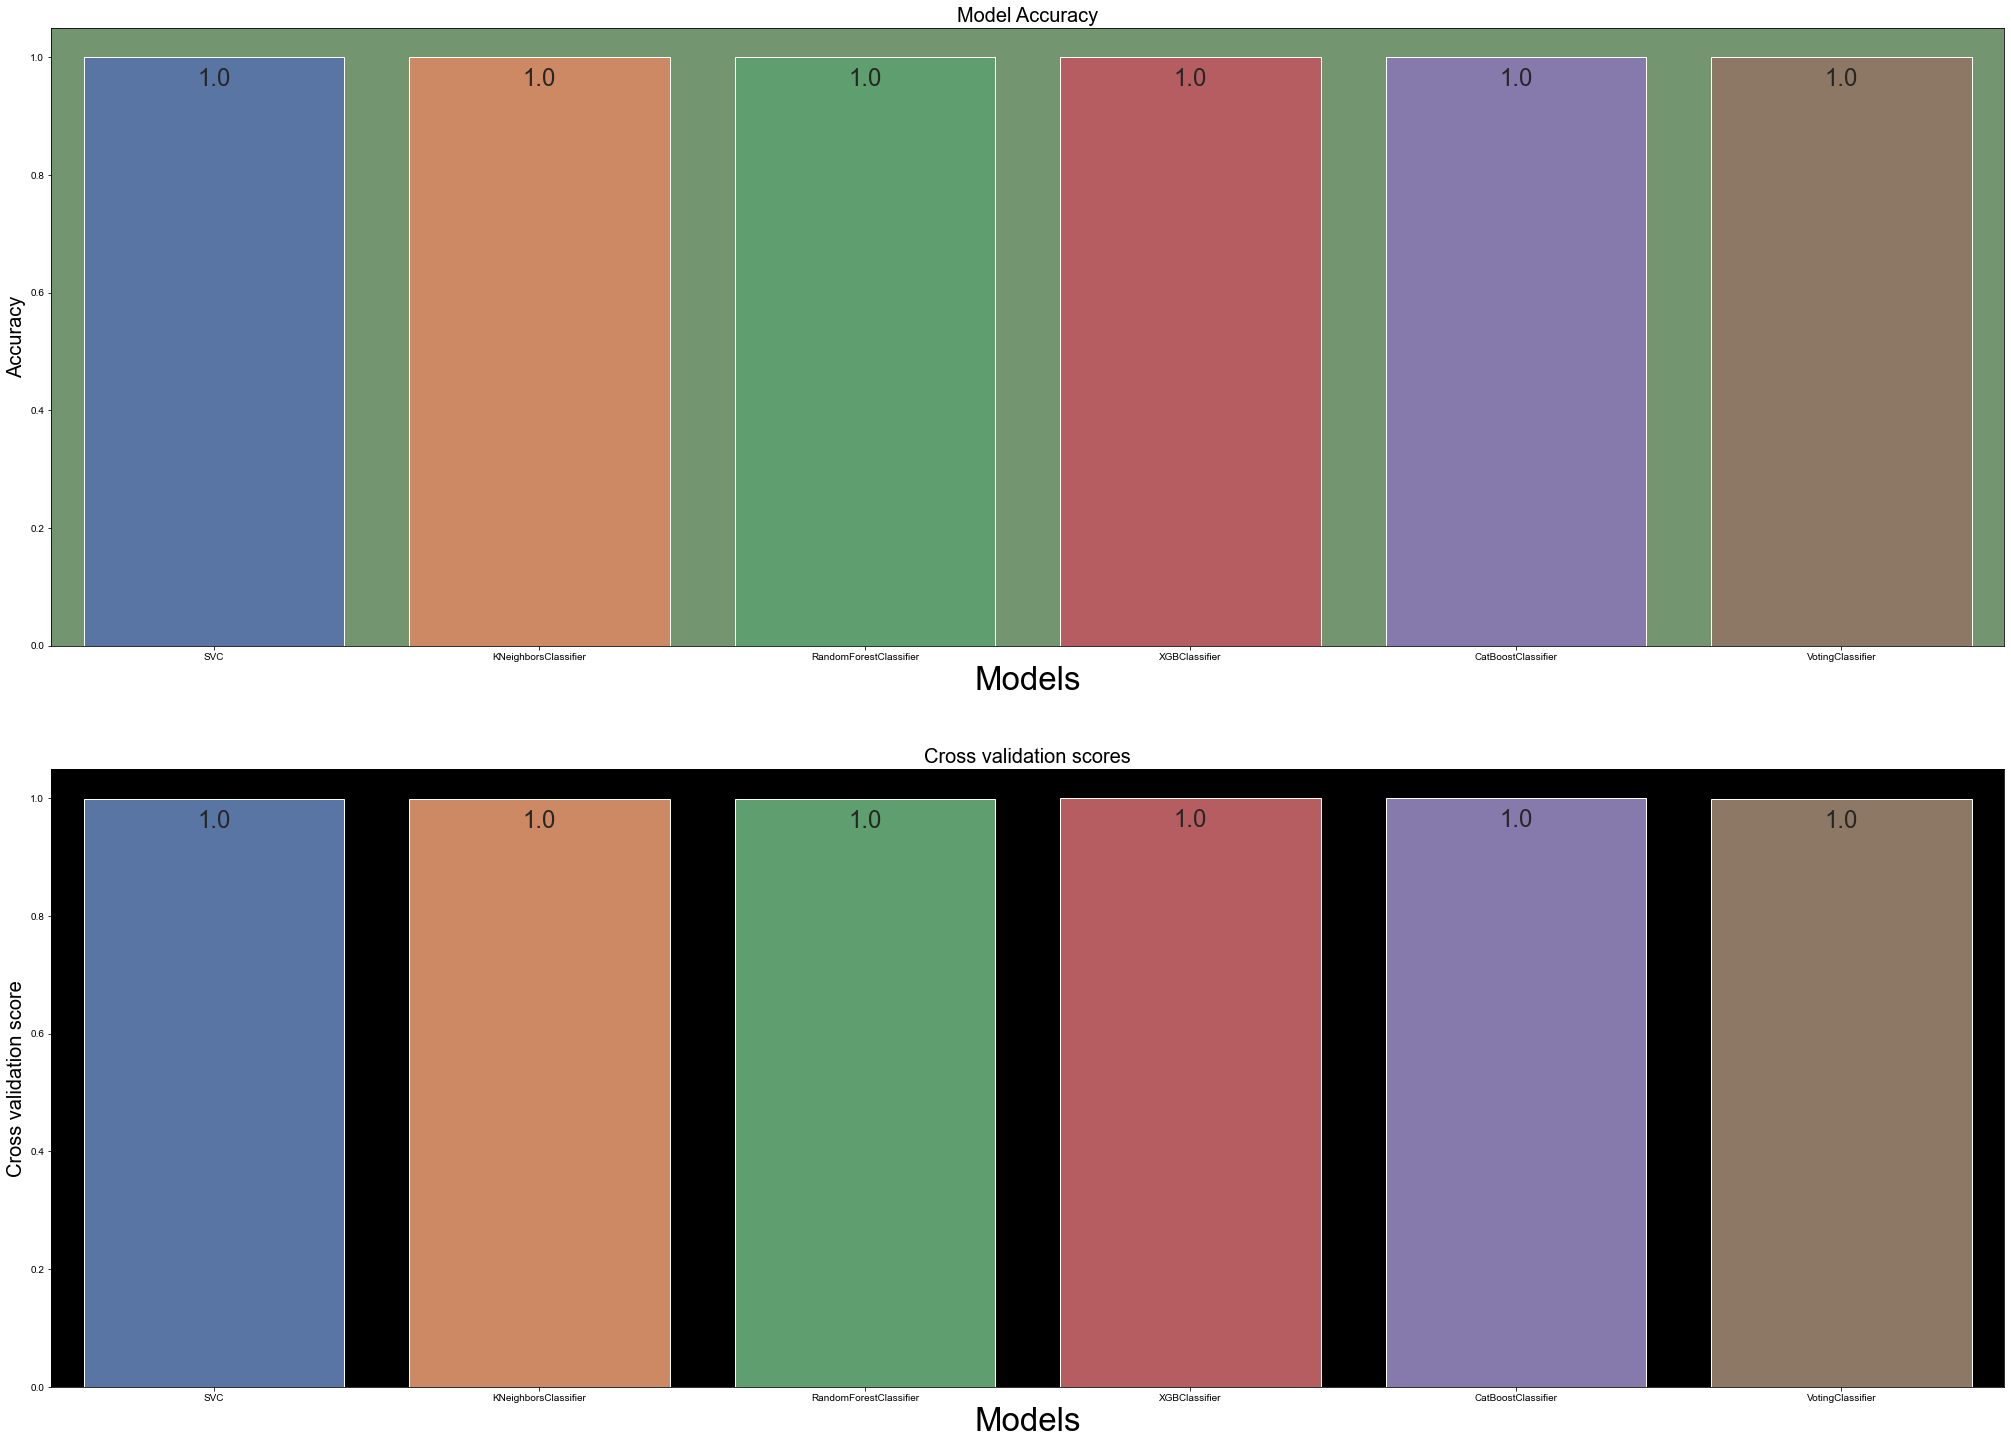

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35, 25))
model_names_bar = ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'XGBClassifier', "CatBoostClassifier",
                  "VotingClassifier"]
sns.set(font_scale = 2)

splot = sns.barplot(ax=ax1,x = model_names_bar,y= accuracy)
ax1.set_title('Model Accuracy', fontsize=20)
ax1.set_ylabel('Accuracy', fontsize=20)
ax1.set_xlabel('Models', fontsize=33)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -22), 
                   textcoords = 'offset points')
ax1.set_facecolor('#73956F')

splot2 = sns.barplot(ax=ax2,x = model_names_bar,y=  cross_vals)
ax2.set_title('Cross validation scores', fontsize=20)
ax2.set_ylabel('Cross validation score', fontsize=20)
ax2.set_xlabel('Models', fontsize=33)
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -22), 
                   textcoords = 'offset points')
ax2.set_facecolor('black')

plt.show()

# Second Example: Market Response Model 

Data is taken from https://www.kaggle.com/rodsaldanha/arketing-campaign

## Importing Libraries and Data

In [79]:
#!pip install scikit-learn-extra
!pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11112 sha256=1018a62d4f612ab368206ad97fc4bcaf83c25b8c99194fc3d18b856b7201532a
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7f\1a\65\84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [3]:
import numpy as np
from imblearn.combine import SMOTETomek
from numpy import isnan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from datetime import date
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn_extra.cluster import KMedoids
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix
import optuna
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from functools import partial
from sklearn.feature_selection import VarianceThreshold
from optuna import Trial, visualization
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif
import collections
from collections import Counter
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('J:\java\Python\2020\PortfolioProject\MLModel'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
dataset=pd.read_csv('J:\\java\\Python\\2020\\PortfolioProject\\MLModel\\marketing_campaign.csv',header=0,sep=';') 

## Data Preprocessing 

Custom transformers creation

In [11]:
#Feature type selection
class feat_sel(BaseEstimator, TransformerMixin):
    def __init__(self, dtype='numeric'):
        self.dtype = dtype

    def fit( self, X, y=None ):
        return self 

    def transform(self, X, y=None):
        if self.dtype == 'numeric':
            num_cols = X.columns[X.dtypes != object].tolist()
            return X[num_cols]
        elif self.dtype == 'category':
            cat_cols = X.columns[X.dtypes == object].tolist()
            return X[cat_cols]
    def get_feature_names(self):
        if self.dtype == 'numeric':
            num_cols = X.columns[X.dtypes != object].tolist()
            return X[num_cols]
        elif self.dtype == 'category':
            cat_cols = X.columns[X.dtypes == object].tolist()
            return X[cat_cols]

In [12]:
class Label_encode(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        #Ordinal encoding by LTV values : Champions have highest LTV followed by Loyal customers etc...
            #(see previous notebook called "RFM segmentation and CLV modeling" if needed)
        X['Segment']=X['Segment'].replace({'Champions':9,'Loyal customers':8,'Cant loose them':7,'At risk':6,
                                           'Potential loyalist':5,'Need attention':4,'Promising':3,'New customers':2,
                                           'About to sleep':1,'Lost':0}, regex=True)
        #1=In couple, 0=Alone
        X['Marital_Status']=X['Marital_Status'].replace({'Divorced':0,'Single':0,
                                                                        'Married':1,'Together':1,                                                  
                                                         'Absurd':0,'Widow':0,'YOLO':0,'Alone':0}, regex=True)
        self.columns = X.columns
        return X
    def get_feature_names(self):
        return list(self.columns)

In [13]:
#Power transformation
class df_unskewed(TransformerMixin,BaseEstimator):
    
    def __init__(self, method='yeo-johnson'):
        
        self.method = method
        self.standardize=False #Standardize = False as we use the custom class "df_scaler"

    def fit(self, X, y=None):
        if self.method == 'yeo-johnson':
            self.scl = PowerTransformer(method=self.method,standardize=False)
            self.scl.fit(X)
            return self
        elif self.method == 'None':
            return self

    def transform(self, X):
        if self.method == 'yeo-johnson':
            Xscl = self.scl.transform(X)
            Xscaled = pd.DataFrame(Xscl, index=X.index, columns=X.columns)
            self.columns = X.columns
            return Xscaled
        elif self.method == 'None':
            Xscl = X
            Xscaled = pd.DataFrame(Xscl, index=X.index, columns=X.columns)
            self.columns = X.columns
            return Xscaled
    def get_feature_names(self):
        return list(self.columns)

In [14]:
#Scale
class df_scaler(BaseEstimator, TransformerMixin):
    def __init__(self, method=StandardScaler()):
        super().__init__()
        self.method = method        

    def fit(self, X, y=None):
        return self.method.fit(X)

    def transform(self, X, y=None):
        Xscl = self.method.transform(X)
        Xscaled = pd.DataFrame(Xscl, index=X.index, columns=X.columns)
        self.columns = X.columns
        return Xscaled
    def get_feature_names(self):
        return list(self.columns)  

In [15]:
class FeatureUnion_df(TransformerMixin, BaseEstimator):
    
    def __init__(self, transformer_list, n_jobs=None, transformer_weights=None, verbose=False):
        self.transformer_list = transformer_list
        self.n_jobs = n_jobs
        self.transformer_weights = transformer_weights
        self.verbose = verbose  
        self.feat_un = FeatureUnion(self.transformer_list, 
                                    self.n_jobs, 
                                    self.transformer_weights, 
                                    self.verbose)
    def fit(self, X, y=None):
        self.feat_un.fit(X)
        return self

    def transform(self, X, y=None):
        X_tr = self.feat_un.transform(X)
        columns = []
        
        for trsnf in self.transformer_list:
            cols = trsnf[1].steps[-1][1].get_feature_names()  
            columns += list(cols)

        X_tr = pd.DataFrame(X_tr, index=X.index, columns=columns)
        
        return X_tr

    def get_params(self, deep=True): 
        return self.feat_un.get_params(deep=deep)
    def get_feature_names(self):
        return self.columns

In [16]:
#Model Selection
class Model_selection(BaseEstimator):
    def __init__(self, estimator = CatBoostClassifier()):
        self.estimator = estimator
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

In [17]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We have 3 categorical variables and 26 numerical variables

In [18]:
#Missing Values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
Income                  24  0.010714
ID                       0  0.000000
NumDealsPurchases        0  0.000000
Z_Revenue                0  0.000000
Z_CostContact            0  0.000000
Complain                 0  0.000000
AcceptedCmp2             0  0.000000
AcceptedCmp1             0  0.000000
AcceptedCmp5             0  0.000000
AcceptedCmp4             0  0.000000
AcceptedCmp3             0  0.000000
NumWebVisitsMonth        0  0.000000
NumStorePurchases        0  0.000000
NumCatalogPurchases      0  0.000000
NumWebPurchases          0  0.000000
MntGoldProds             0  0.000000
Year_Birth               0  0.000000
MntSweetProducts         0  0.000000
MntFishProducts          0  0.000000
MntMeatProducts          0  0.000000

On classification problems, analyzing the class distribution is always an important step as highly imbalanced data are common and need special treatment.
Let's check if data are imbalanced :

In [19]:
target = dataset['Response']
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=1, Count=334, Percentage=14.91%
Class=0, Count=1906, Percentage=85.09%


The dataset is imbalanced. We will have to add a resampling step in our pipeline.
We will use the SMOTETomek technique which combine a synthetic oversampling sequence (SMOTE) followed by an undersampling sequence (TOMEK)
Step 1 : Oversampling synthetically the minority class
Step 2 : Undersampling by cleaning the noise generated by the SMOTE technique

## Feature Engineering

In [20]:
dataset.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   
5  2013-09-09       16       520  ...                  6             0   
6  2012-11-13       34       235  ...                  6             0   
7  2013-05-08       32        76  ...                  8             0   
8  2013-06-06       19        14  ...                  9             0   
9  2014-03-13       68        28  ...                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0             0             0             0         0   
8             0             0             0             0         0   
9             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  
5              3         11         0  
6              3         11         0  
7              3         11         0  
8              3         11         1  
9              3         11         0  

[10 rows x 29 columns]

We will create several variables :

Variable *Seniority* as the number of months the customer is enrolled with the company <br>
Variable *Educationnal years* as the total number of years of education the individual achieved according to its diploma <br>
Variable *Accepted offers* as the total number of offers accepted during the 5 past marketing campaigns <br>
Variable *Segment* created from the <a href="https://www.kaggle.com/raphael2711/rfm-segmentation-and-clv-modeling">RFM segmentation </a> 

As seen in the <a href="https://www.kaggle.com/raphael2711/data-prep-visual-eda-and-statistical-hypothesis">previous notebooks</a>, we will remove the outlier in *Income* variable along with removing unused variables

In [21]:
#features creation
last_date = date(2014,10, 4)
dataset['Seniority']=pd.to_datetime(dataset['Dt_Customer'], dayfirst=True,format = '%Y-%m-%d')
dataset['Seniority'] = pd.to_numeric(dataset['Seniority'].dt.date.apply(lambda x: (last_date - x)).dt.days, downcast='integer')/30
dataset['Accepted_offers']=dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']
dataset['Educationnal_years']=dataset['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})
dataset = dataset[dataset['NumWebPurchases']+dataset['NumCatalogPurchases']+dataset['NumStorePurchases'] > 0]
dataset=dataset.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Education','Dt_Customer','Z_CostContact','Z_Revenue'])
#1.Outliers removal
dataset = dataset.drop(dataset[dataset['Income']> 600000].index).reset_index(drop=True)

In [22]:
### RFM calculation
#1.Dataframe creation
recency_df = dataset[['ID','Recency']]
frequency_df = dataset[['ID','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
frequency_df['Transactions']=frequency_df['NumWebPurchases']+frequency_df['NumCatalogPurchases']+frequency_df['NumStorePurchases']
frequency_df=frequency_df.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'])

temp_df = recency_df.merge(frequency_df,on='ID')
monetary_df = dataset[['ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
monetary_df['Spending']=monetary_df['MntWines']+dataset['MntFruits']+dataset['MntMeatProducts']+dataset['MntFishProducts']+dataset['MntSweetProducts']+dataset['MntGoldProds']
monetary_df=monetary_df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])
RFM=recency_df.merge(frequency_df,on='ID').merge(monetary_df,on='ID')
RFM.columns = ['ID','Recency','Frequency','Monetary']

#2.Clusters creation
kmedoids_recency = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(RFM[['Recency']])
RFM['RecencyCluster'] = kmedoids_recency.predict(RFM[['Recency']])
kmedoids_frequency = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(RFM[['Frequency']])
RFM['FrequencyCluster'] = kmedoids_frequency.predict(RFM[['Frequency']])
kmedoids_monetary = KMedoids(n_clusters=5, random_state=0, max_iter=1000,init='k-medoids++',metric='euclidean').fit(RFM[['Monetary']])
RFM['MonetaryCluster'] = kmedoids_monetary.predict(RFM[['Monetary']])

3.#Clusters ordering
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

RFM = order_cluster('RecencyCluster', 'Recency',RFM,False)
RFM = order_cluster('FrequencyCluster', 'Frequency',RFM,True)
RFM = order_cluster('MonetaryCluster', 'Monetary',RFM,True)


#4.Segments creation
segt_map = {
    r'30': 'Promising',
    r'23': 'Loyal customers',
    r'24': 'Loyal customers',
    r'33': 'Loyal customers',
    r'34': 'Loyal customers',
    r'43': 'Loyal customers',
    r'32': 'Potential loyalist',
    r'31': 'Potential loyalist',
    r'42': 'Potential loyalist',
    r'41': 'Potential loyalist',
    r'21': 'Need attention',
    r'22': 'Need attention',
    r'12': 'Need attention',
    r'11': 'Need attention',
    r'40': 'New customers',
    r'20': 'About to sleep',
    r'14': 'Cant loose them',
    r'04': 'Cant loose them',
    r'10': 'Lost',
    r'00': 'Lost',
    r'01': 'Lost',
    r'02': 'At risk',
    r'03': 'At risk',
    r'13': 'At risk',
    r'44': 'Champions',
}
#We create the segment and merge with our main dataset
RFM['Segment'] = RFM['RecencyCluster'].map(str) + RFM['FrequencyCluster'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
dataset=dataset.merge(RFM[['ID','Segment']],on='ID')

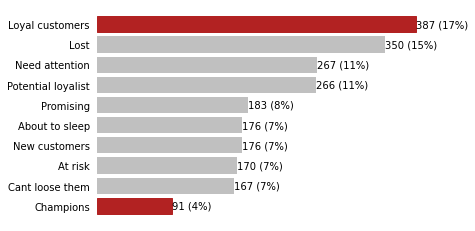

In [23]:
# count the number of customers in each segment
segments_counts = dataset['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Champions', 'Loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
plt.show()

### Skew of univariate distribution

In [24]:
num_feats=dataset.dtypes[dataset.dtypes!='object'].index
skew_feats=dataset[num_feats].skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew':skew_feats})
print('We have {} skewed numerical features'.format(skewness[abs(skewness) > 0.75].shape[0]))
display(skewness.style.background_gradient(cmap = 'Reds', axis = 0))

We have 22 skewed numerical features


We will add a power transform step in our pipeline. Depending on the selected model, making data more Gaussian-like (Normal Distribution) could improve the obtained performance

### Feature Selection 

Features with low variances are believed to contain very few information as they are approximatively constant and will probably not improve the performance of the model

In [25]:
Features = []
val=[]
var=[]
X=dataset.drop(columns=['Segment','Marital_Status','Response'])

for column in X:
    most_freq_value = np.round((X[column].value_counts(normalize = True).iloc[0])*100, 2)
    variance=X[column].var()
    Features.append(column)
    val.append(most_freq_value)
    var.append(variance)
count = pd.DataFrame(list(zip(Features, val,var)), columns =['Feature', 'Count%','Variance']).sort_values(ascending=False,by='Count%')
display(count.style.background_gradient(cmap = 'Reds', axis = 0,subset='Count%'))

Feature selction enables us to :
>- Remove redundant data leading to reducing overfitting
>- Remove irrelevant data leading to improving accuracy
>- Reduce number of features leading to faster training time

Variance analysis, correlation analysis and multicollinearity analysis will be done.   
Univariate feature selection will be done with ANOVA F-value calculation and will be integrated in the gridsearching process <br>

We can see that "Complain" variable has a variance almost equal to 0 and that 99% of the rows have the same value.
We will therefore remove it.

### Correlation

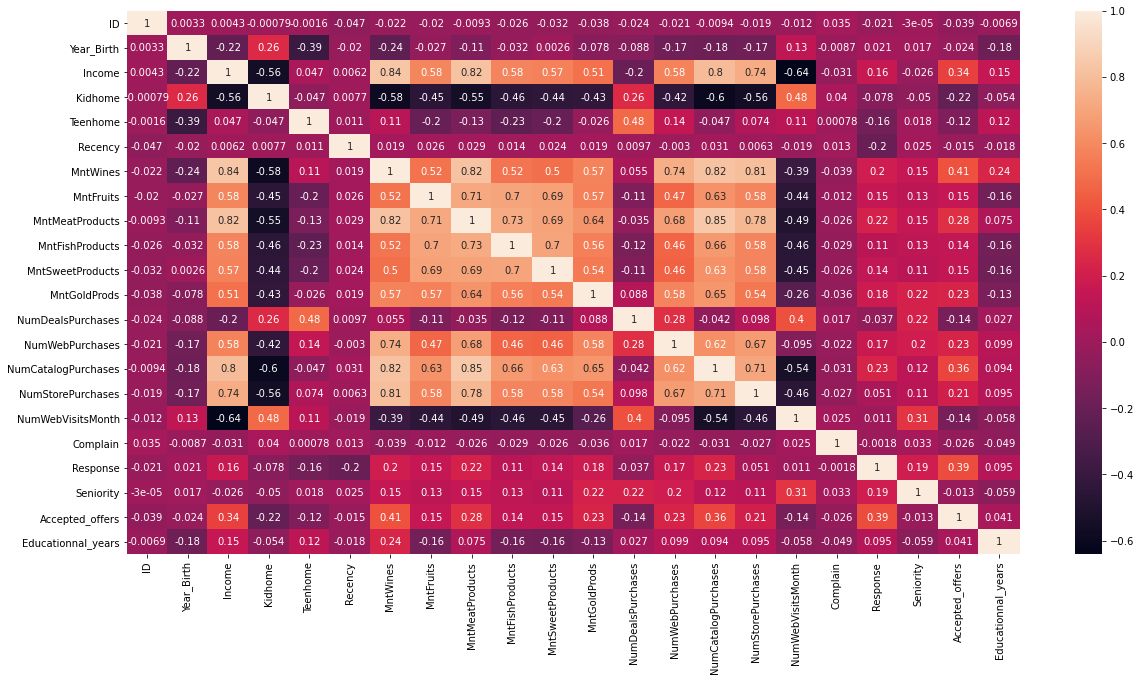

In [26]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= dataset.corr(method='spearman')
sns.heatmap(c,annot=True);

We can see the variable **Income** has a high correlation with other variables. This can inform us of the presence of multicollinearity.

To detect multicollinearity, we will use the Variable Inflation Factors method (VIF). It measures the strength of the correlation between our independant variables.
We set our max threshold at 10

In [28]:
#Filter on non null value and exclude categoricals + target + Complain (because will be removed as seen earlier)
VIF = dataset[dataset['Income'].notnull()].drop(columns=['Segment','Marital_Status','Response','Complain'])
vif_data = pd.DataFrame()
vif_data["Feature"] = VIF.columns
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(len(VIF.columns))]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data.style.background_gradient(cmap = 'Reds', axis = 0)

We can see that *NumStorePurchases*, *NumWebVisitsMonth*, *Year_Birth*, *Income* and *Educationnal_years* have high VIF.  
>- As presumed, the high correlation coefficient of Income result in a high VIF
>- We assume Year_Birth to be a variable that can be easily predicted by others like Kidhome, Teenhome, Income...  

We will remove the variable Year_Birth and Income and recheck if the VIF of other variables dropped

In [30]:
#We remove Year_Birth + Income and recalculate the VIF of other features 
VIF_filter=dataset.drop(columns=['Income','Segment','Marital_Status','Response','Complain','Year_Birth'])
vif_filtered_data = pd.DataFrame() 
vif_filtered_data["Feature"] = VIF_filter.columns 
vif_filtered_data["VIF"] = [variance_inflation_factor(VIF_filter.values, i) for i in range(len(VIF_filter.columns))]
#Filter to variables with VIF greater than 5 as the others are ok
vif_filtered_data=vif_filtered_data[vif_filtered_data["VIF"] > 5]
vif_filtered_data=vif_filtered_data.sort_values(by='VIF',ascending=False)
vif_filtered_data.style.background_gradient(cmap = 'Reds', axis = 0)

We can see that VIF of Educational_years decreased. Nonetheless, the VIF of NumWebVisitsMonth remains above 10.
As this variable is not a direct aggregation of others variables, we decide to remove this single variable and keep the others.

Nota Bene : From here, we will also remove the variable ID as it's the unique identifier of the customer and it will be useless for the classification model

In [31]:
dataset=dataset.drop(columns=['Income','NumWebVisitsMonth','ID','Complain','Year_Birth'])
#Final dataset before modeling
dataset

Marital_Status  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0            Single        0         0       58       635         88   
1            Single        1         1       38        11          1   
2          Together        0         0       26       426         49   
3          Together        1         0       26        11          4   
4           Married        1         0       94       173         43   
...             ...      ...       ...      ...       ...        ...   
2228        Married        0         1       46       709         43   
2229       Together        2         1       56       406          0   
2230       Divorced        0         0       91       908         48   
2231       Together        0         1        8       428         30   
2232        Married        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2228              182               42               118           247   
2229               30                0                 0             8   
2230              217               32                12            24   
2231              214               80                30            61   
2232               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2228                  2                9                    3   
2229                  7                8                    2   
2230                  1                2                    3   
2231                  2                6                    5   
2232                  3                3                    1   

      NumStorePurchases  Response  Seniority  Accepted_offers  \
0                     4         1  25.333333                0   
1                     2         0   7.000000                0   
2                    10         0  13.633333                0   
3                     4         0   7.866667                0   
4                     6         0   8.600000                0   
...                 ...       ...        ...              ...   
2228                  4         0  15.933333                0   
2229                  5         0   3.866667                1   
2230                 13         0   8.400000                1   
2231                 10         0   8.433333                0   
2232                  4         1  23.966667                0   

      Educationnal_years             Segment  
0                     12     Loyal customers  
1                     12           Promising  
2                     12     Loyal customers  
3                     12           Promising  
4                     21             At risk  
...                  ...                 ...  
2228                  12      Need attention  
2229                  21      Need attention  
2230                  12             At risk  
2231                  18           Champions  
2232                  21  Potential loyalist  

[2233 rows x 19 columns]

### Split Data

In [32]:
X=dataset.drop(columns=['Response'])
Y=dataset['Response']
#1. Split data into X and Y. We use stratify to keep an equal proportion of examples in each class between train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.2, random_state=1,shuffle=True, stratify=Y)
target = y_train
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=1, Count=267, Percentage=14.95%
Class=0, Count=1519, Percentage=85.05%


In [33]:
## Pipeline
numeric_pipe = Pipeline([('fs', feat_sel(dtype='numeric')),  # Select only the numeric features
                         ('unskewed', df_unskewed()), #Unskew data
                         ('scl', df_scaler()) # Scale data
                        ])  
categorical_pipeline = Pipeline( steps = [( 'fs', feat_sel(dtype='category')), # Select only the categorical features
                                          ('label_encoder', Label_encode()), #Label encoder
                                          ])
processing_pipe = FeatureUnion_df(transformer_list=[('cat_pipe', categorical_pipeline),
                                                    ('num_pipe', numeric_pipe)
                                                   ])

## Model creation 

Our first step will be to test different models without heavy hyperparameter tuning.
We will evaluate the different models with weighted F1-score.
As we are running model selection and hyperparameter tunning at the same time, we will do a nested cross-validation to get an unbiaised estimate of model performance. Two cross-validation loops are performed in parallel:

One inner loop by the GridSearchCV estimator for hyperparameter otpimization, preprocessing steps and feature selection
One outer loop to measure the prediction performance of the estimator.
The resulting scores are unbiased estimates of the prediction score on new data. Nested cross-validation along the use of pipelines enables us to prevent data leakage.

We use a mix of different models :
- 2 linear models (Logistic Regression and Linear Discriminant Analysis)
- 2 nonlinear models (Support Vector Machine and K-Nearest Neighbors)
- 2 ensemble algorithms (Random Forest and Catboost)

Our Nested cross validation will evaluate a total of 3690 combinations (246x3x5)

In [34]:
%%time

#Outer loop
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
outer_results = list()

for train_ix, valid_ix in cv_outer.split(X_train,y_train):
    Xtrain, X_valid = X_train.iloc[train_ix, :], X_train.iloc[valid_ix, :]
    ytrain, y_valid = y_train.iloc[train_ix], y_train.iloc[valid_ix]
       
    #our pipeline    
    pipe = Pipeline([
    ('prep',processing_pipe),
    ('selector', SelectKBest(f_classif, k=10)),
    ('resample' ,SMOTETomek(sampling_strategy=0.7,random_state=1)),
    ('est', Model_selection())])
    
    #search space containing feature selection, preprocessing steps and model hyperparameters
    search_space = [
                {'est__estimator':[SVC()],
                 'selector__k': [10,14,18],
                 'est__estimator__C': [0.1,1,10],
                 'est__estimator__kernel': ['rbf', 'poly'],
                 'est__estimator__random_state' : [1],
                 'est__estimator__verbose' : [False],
                 'prep__num_pipe__unskewed__method': ['yeo-johnson','None'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]},
        
                {'est__estimator':[LogisticRegression()],
                'selector__k': [10,14,18],
                'est__estimator__random_state' : [1],
                 'est__estimator__verbose' : [False],
                 'prep__num_pipe__unskewed__method': ['yeo-johnson','None'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]},    
        
                {'est__estimator':[KNeighborsClassifier()],
                 'selector__k': [10,14,18],
                 'est__estimator__n_neighbors': [3,5,11,15],
                 'est__estimator__metric' : ['euclidean', 'manhattan'],
                 'prep__num_pipe__unskewed__method': ['yeo-johnson','None'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]},
        
                {'est__estimator':[LinearDiscriminantAnalysis()],
                 'selector__k': [10,14,18],
                 'est__estimator__solver':  ['svd', 'lsqr'],
                 'prep__num_pipe__unskewed__method': ['yeo-johnson','None'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]},
        
                {'est__estimator':[RandomForestClassifier()],
                 'selector__k': [10,14,18],
                 'est__estimator__random_state' : [1],
                 'est__estimator__n_estimators': [10, 100, 1000],
                 'est__estimator__max_features' : ['sqrt', 'log2'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]}, 

                {'est__estimator': [CatBoostClassifier()],
                 'selector__k': [10,14,18],
                 'est__estimator__random_state' : [1],
                 'est__estimator__silent' : [True],
                 'est__estimator__early_stopping_rounds':[100],
                 'est__estimator__loss_function':['CrossEntropy'],
                 'prep__num_pipe__scl__method': [StandardScaler(),RobustScaler()]},
                  ]
    #inner loop
    cv_inner=StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
    clf = GridSearchCV(pipe, search_space,cv=cv_inner, scoring='f1_weighted',refit=True)
    clf.fit(Xtrain, ytrain)

    best_model = clf.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_valid)
    # F1 score
    F1 = f1_score(y_valid, yhat,average='weighted')
    # store the result
    outer_results.append(F1)
    # report best model for each fold of the outer loop
    print('>F1=%.3f, best score=%.3f, model=%s' % (F1, clf.best_score_, clf.best_params_))
# Get a summarized result
print('Weighted F1-score: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>F1=0.900, best score=0.876, model={'est__estimator': <catboost.core.CatBoostClassifier object at 0x000001FE20724880>, 'est__estimator__early_stopping_rounds': 100, 'est__estimator__loss_function': 'CrossEntropy', 'est__estimator__random_state': 1, 'est__estimator__silent': True, 'prep__num_pipe__scl__method': StandardScaler(), 'selector__k': 18}
>F1=0.858, best score=0.882, model={'est__estimator': SVC(C=10, random_state=1), 'est__estimator__C': 10, 'est__estimator__kernel': 'rbf', 'est__estimator__random_state': 1, 'est__estimator__verbose': False, 'prep__num_pipe__scl__method': RobustScaler(), 'prep__num_pipe__unskewed__method': 'None', 'selector__k': 18}
>F1=0.864, best score=0.889, model={'est__estimator': <catboost.core.CatBoostClassifier object at 0x000001FE206F2CD0>, 'est__estimator__early_stopping_rounds': 100, 'est__estimator__loss_function': 'CrossEntropy', 'est__estimator__random_state': 1, 'est__estimator__silent': True, 'prep__num_pipe__scl__method': RobustScaler(), 'sele

In [36]:
def format_cv_results(search):
    df = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Score"])],axis=1)
    df = df.sort_values("Score", ascending=False)
    return df.fillna(value="")
df_res = format_cv_results(clf)
df_res.head(10)

est__estimator est__estimator__C  \
245  <catboost.core.CatBoostClassifier object at 0x...                     
53                                               SVC()              10.0   
242  <catboost.core.CatBoostClassifier object at 0x...                     
59                                               SVC()              10.0   
50                                               SVC()              10.0   
230                           RandomForestClassifier()                     
212                           RandomForestClassifier()                     
218                           RandomForestClassifier()                     
236                           RandomForestClassifier()                     
221                           RandomForestClassifier()                     

    est__estimator__kernel est__estimator__random_state  \
245                                                 1.0   
53                     rbf                          1.0   
242                                                 1.0   
59                     rbf                          1.0   
50                     rbf                          1.0   
230                                                 1.0   
212                                                 1.0   
218                                                 1.0   
236                                                 1.0   
221                                                 1.0   

    est__estimator__verbose prep__num_pipe__scl__method  \
245                                      RobustScaler()   
53                    False            StandardScaler()   
242                                    StandardScaler()   
59                    False              RobustScaler()   
50                    False            StandardScaler()   
230                                    StandardScaler()   
212                                    StandardScaler()   
218                                    StandardScaler()   
236                                    StandardScaler()   
221                                      RobustScaler()   

    prep__num_pipe__unskewed__method  selector__k est__estimator__metric  \
245                                            18                          
53                              None           18                          
242                                            18                          
59                              None           18                          
50                       yeo-johnson           18                          
230                                            18                          
212                                            18                          
218                                            18                          
236                                            18                          
221                                            18                          

    est__estimator__n_neighbors est__estimator__solver  \
245                                                      
53                                                       
242                                                      
59                                                       
50                                                       
230                                                      
212                                                      
218                                                      
236                                                      
221                                                      

    est__estimator__max_features est__estimator__n_estimators  \
245                                                             
53                                                              
242                                                             
59                                                              
50                                                              
230                         log2     

### Hyperparameter tuning with Optuna

In [37]:
def objective_catboost(trial):
    numeric_pipe = Pipeline([('fs', feat_sel(dtype='numeric')),  # Select only the numeric features
                             ('scl', df_scaler(method=RobustScaler())) # Scale data
                             ]) 
                         
    categorical_pipeline = Pipeline( steps = [( 'fs', feat_sel(dtype='category')), # Select only the categorical features
                                              ('label_encoder', Label_encode()), #Label encoder
                                             ])
    processing_pipe = FeatureUnion_df(transformer_list=[('cat_pipe', categorical_pipeline),
                                                        ('num_pipe', numeric_pipe)])        
    
    cv_outer=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)  
    param = {        
        'learning_rate': trial.suggest_float('learning_rate', 0.01,0.1),
        'n_estimators': trial.suggest_int( "n_estimators",  50,300,20),
        'max_depth': trial.suggest_int( 'max_depth',  1,5,1),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg',1,5,1),
        'random_state': trial.suggest_categorical('random_state',[1]),
        'loss_function': trial.suggest_categorical('loss_function',['CrossEntropy']),
        'eval_metric': trial.suggest_categorical('eval_metric',['F1']),
        'silent':trial.suggest_categorical('silent',[True]), 
        'early_stopping_rounds':trial.suggest_categorical('early_stopping_rounds',[100])}   
    pipe = Pipeline([
        ('prep',processing_pipe),
        ('resample' ,SMOTETomek(sampling_strategy=0.7,random_state=1)),
        ('est', CatBoostClassifier(**param))])     
    return cross_val_score(pipe, X_train, y_train,cv=cv_outer,scoring="f1_weighted").mean()

In [38]:
%%time
models=[]
scores=[]
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(objective_catboost, n_trials=50)
model='Catboost'
score=catboost_study.best_trial.value
models.append(model)
scores.append(score)

[I 2021-09-19 19:09:59,356] A new study created in memory with name: no-name-78d0d00a-eea7-4aa5-99ed-3d277543a493
[I 2021-09-19 19:10:02,083] Trial 0 finished with value: 0.87473965196417 and parameters: {'learning_rate': 0.07913547057680652, 'n_estimators': 130, 'max_depth': 3, 'l2_leaf_reg': 4, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 0 with value: 0.87473965196417.
[I 2021-09-19 19:10:04,013] Trial 1 finished with value: 0.8640942130161487 and parameters: {'learning_rate': 0.09513022371429947, 'n_estimators': 50, 'max_depth': 2, 'l2_leaf_reg': 4, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 0 with value: 0.87473965196417.
[I 2021-09-19 19:10:07,703] Trial 2 finished with value: 0.8787990950086779 and parameters: {'learning_rate': 0.036595784249555036, 'n_estimators': 230, 'max_depth': 3, 'l2_leaf_reg': 1

[I 2021-09-19 19:11:47,757] Trial 22 finished with value: 0.8781923731871288 and parameters: {'learning_rate': 0.06693724746378055, 'n_estimators': 290, 'max_depth': 4, 'l2_leaf_reg': 2, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 21 with value: 0.8859239388007356.
[I 2021-09-19 19:11:53,908] Trial 23 finished with value: 0.88170799757147 and parameters: {'learning_rate': 0.033927942444872704, 'n_estimators': 270, 'max_depth': 5, 'l2_leaf_reg': 1, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 21 with value: 0.8859239388007356.
[I 2021-09-19 19:11:59,543] Trial 24 finished with value: 0.879081946939211 and parameters: {'learning_rate': 0.05179892747349163, 'n_estimators': 250, 'max_depth': 5, 'l2_leaf_reg': 2, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stoppin

[I 2021-09-19 19:13:29,398] Trial 45 finished with value: 0.881939314738081 and parameters: {'learning_rate': 0.08693489881995416, 'n_estimators': 270, 'max_depth': 2, 'l2_leaf_reg': 4, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 21 with value: 0.8859239388007356.
[I 2021-09-19 19:13:33,305] Trial 46 finished with value: 0.8815334639355055 and parameters: {'learning_rate': 0.09700432162042176, 'n_estimators': 290, 'max_depth': 2, 'l2_leaf_reg': 4, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}. Best is trial 21 with value: 0.8859239388007356.
[I 2021-09-19 19:13:36,909] Trial 47 finished with value: 0.8849751519964704 and parameters: {'learning_rate': 0.08441517277174809, 'n_estimators': 250, 'max_depth': 2, 'l2_leaf_reg': 5, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stoppi

Wall time: 3min 44s


In [39]:
print('Number of finished trials:', len(catboost_study.trials))
print('Best trial: score {}, params {}'.format(catboost_study.best_trial.value, catboost_study.best_trial.params))

Number of finished trials: 50
Best trial: score 0.8859239388007356, params {'learning_rate': 0.04440931612028053, 'n_estimators': 290, 'max_depth': 4, 'l2_leaf_reg': 2, 'random_state': 1, 'loss_function': 'CrossEntropy', 'eval_metric': 'F1', 'silent': True, 'early_stopping_rounds': 100}


In [40]:
# RandomForest
def objective_random_forest(trial):
    numeric_pipe = Pipeline([('fs', feat_sel(dtype='numeric')),  # Select only the numeric features
                         ('scl', df_scaler(method=RobustScaler())) # Scale data
                        ])  
    categorical_pipeline = Pipeline( steps = [( 'fs', feat_sel(dtype='category')), # Select only the categorical features
                                          ('label_encoder', Label_encode()), #Label encoder
                                          ])
    processing_pipe = FeatureUnion_df(transformer_list=[('cat_pipe', categorical_pipeline),
                                                    ('num_pipe', numeric_pipe)
                                                   ])
    
    cv_outer=StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
    param = {        
        'n_estimators': trial.suggest_int( 'n_estimators',  10,1000,200),
        'max_features': trial.suggest_categorical( 'max_features', ['sqrt', 'log2']),
        'max_depth': trial.suggest_categorical('max_depth',[10, 20, 30,None]),
        'bootstrap': trial.suggest_categorical('bootstrap',[True, False]),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',1,9,2),
        'random_state': trial.suggest_categorical('random_state',[1]),
        'criterion':trial.suggest_categorical('criterion',['gini', 'entropy']),
        'verbose':trial.suggest_categorical('verbose',[0]), 
        }
        
    pipe = Pipeline([
        ('prep',processing_pipe),
        ('resample' ,SMOTETomek(sampling_strategy=0.7,random_state=1)),
        ('est', RandomForestClassifier(**param))])     
    return cross_val_score(pipe, X_train, y_train,  cv=cv_outer,scoring="f1_weighted").mean()

In [41]:
%%time
RF_study = optuna.create_study(direction='maximize')
RF_study.optimize(objective_random_forest, n_trials=50)
model='Random Forest'
score=RF_study.best_trial.value
models.append(model)
scores.append(score)

[I 2021-09-19 19:18:58,997] A new study created in memory with name: no-name-8a10e78d-be56-4abe-9f2b-df4767cc6b58
[I 2021-09-19 19:19:13,949] Trial 0 finished with value: 0.8684764539911882 and parameters: {'n_estimators': 610, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False, 'min_samples_leaf': 7, 'random_state': 1, 'criterion': 'entropy', 'verbose': 0}. Best is trial 0 with value: 0.8684764539911882.
[I 2021-09-19 19:19:17,924] Trial 1 finished with value: 0.8687149283435952 and parameters: {'n_estimators': 210, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True, 'min_samples_leaf': 3, 'random_state': 1, 'criterion': 'gini', 'verbose': 0}. Best is trial 1 with value: 0.8687149283435952.
[I 2021-09-19 19:19:23,873] Trial 2 finished with value: 0.8658152636086645 and parameters: {'n_estimators': 210, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False, 'min_samples_leaf': 5, 'random_state': 1, 'criterion': 'entropy', 'verbose': 0}. Best is trial 1 with val

[I 2021-09-19 19:23:53,170] Trial 26 finished with value: 0.8759598722864146 and parameters: {'n_estimators': 610, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'min_samples_leaf': 5, 'random_state': 1, 'criterion': 'entropy', 'verbose': 0}. Best is trial 15 with value: 0.8759598722864146.
[I 2021-09-19 19:24:05,403] Trial 27 finished with value: 0.8693923217520748 and parameters: {'n_estimators': 610, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False, 'min_samples_leaf': 5, 'random_state': 1, 'criterion': 'gini', 'verbose': 0}. Best is trial 15 with value: 0.8759598722864146.
[I 2021-09-19 19:24:17,929] Trial 28 finished with value: 0.8713119125521306 and parameters: {'n_estimators': 610, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'min_samples_leaf': 3, 'random_state': 1, 'criterion': 'entropy', 'verbose': 0}. Best is trial 15 with value: 0.8759598722864146.
[I 2021-09-19 19:24:35,416] Trial 29 finished with value: 0.8688222850791035 and 

Wall time: 8min 34s


In [42]:
print('Number of finished trials:', len(RF_study.trials))
print('Best trial: score {}, params {}'.format(RF_study.best_trial.value, RF_study.best_trial.params))

Number of finished trials: 50
Best trial: score 0.876171240860659, params {'n_estimators': 410, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'min_samples_leaf': 5, 'random_state': 1, 'criterion': 'entropy', 'verbose': 0}


In [43]:
#SVC
def objective_SVC(trial):
    numeric_pipe = Pipeline([('fs', feat_sel(dtype='numeric')),  # Select only the numeric features
                         ('scl', df_scaler(method=RobustScaler())) # Scale data
                        ])  
    categorical_pipeline = Pipeline( steps = [( 'fs', feat_sel(dtype='category')), # Select only the categorical features
                                          ('label_encoder', Label_encode()), #Label encoder
                                          ])
    processing_pipe = FeatureUnion_df(transformer_list=[('cat_pipe', categorical_pipeline),
                                                    ('num_pipe', numeric_pipe)
                                                   ])
    cv_outer=StratifiedKFold(n_splits=5, random_state=7,shuffle=True)
    param = {        
        'C': trial.suggest_loguniform('C', 1e-5, 1e2),
        'gamma': trial.suggest_loguniform('gamma',1e-4, 1e1), 
        'kernel': trial.suggest_categorical('kernel', ['rbf', 'poly']),
        'random_state': trial.suggest_categorical('random_state',[1]),
        'verbose':trial.suggest_categorical('verbose',[0]), 
            }
        
    pipe = Pipeline([
        ('prep',processing_pipe),
        ('resample' ,SMOTETomek(sampling_strategy=0.7,random_state=1)),
        ('est', SVC(**param))])     
    return cross_val_score(pipe, X_train, y_train, cv=cv_outer, scoring="f1_weighted").mean()

In [44]:
%%time
SVC_study = optuna.create_study(direction='maximize')
SVC_study.optimize(objective_SVC, n_trials=50)
model='SVC'
score=SVC_study.best_trial.value
models.append(model)
scores.append(score)

[I 2021-09-19 19:29:44,036] A new study created in memory with name: no-name-ed158d6a-0053-405a-a8ed-2a424153a50f
[I 2021-09-19 19:29:45,503] Trial 0 finished with value: 0.7817961039137007 and parameters: {'C': 0.016271620396677608, 'gamma': 0.005808108203745307, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 0 with value: 0.7817961039137007.
[I 2021-09-19 19:29:46,723] Trial 1 finished with value: 0.8526892954055908 and parameters: {'C': 0.0008186346144864784, 'gamma': 0.10123394072816155, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 1 with value: 0.8526892954055908.
[I 2021-09-19 19:29:48,807] Trial 2 finished with value: 0.8154867223626997 and parameters: {'C': 1.3970341437195049, 'gamma': 0.8641811100142769, 'kernel': 'rbf', 'random_state': 1, 'verbose': 0}. Best is trial 1 with value: 0.8526892954055908.
[I 2021-09-19 19:29:50,340] Trial 3 finished with value: 0.8754895591879659 and parameters: {'C': 65.97901333397282, 'gamma': 0.0255909530

[I 2021-09-19 19:30:44,441] Trial 31 finished with value: 0.8665877030512611 and parameters: {'C': 9.425829112385763, 'gamma': 0.09957010858500683, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 3 with value: 0.8754895591879659.
[I 2021-09-19 19:30:45,974] Trial 32 finished with value: 0.870317282029281 and parameters: {'C': 24.251228971693646, 'gamma': 0.028238139384844114, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 3 with value: 0.8754895591879659.
[I 2021-09-19 19:30:47,512] Trial 33 finished with value: 0.8677396761912035 and parameters: {'C': 33.361036919488356, 'gamma': 0.024935549127396626, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 3 with value: 0.8754895591879659.
[I 2021-09-19 19:30:48,711] Trial 34 finished with value: 0.853126309462963 and parameters: {'C': 2.4879795933040056, 'gamma': 0.006175013238497003, 'kernel': 'poly', 'random_state': 1, 'verbose': 0}. Best is trial 3 with value: 0.8754895591879659.
[I 2

Wall time: 1min 37s


In [45]:
print('Number of finished trials:', len(SVC_study.trials))
print('Best trial: score {}, params {}'.format(SVC_study.best_trial.value, SVC_study.best_trial.params))

Number of finished trials: 50
Best trial: score 0.8754895591879659, params {'C': 65.97901333397282, 'gamma': 0.025590953020749475, 'kernel': 'rbf', 'random_state': 1, 'verbose': 0}


In [46]:
best_model = pd.DataFrame(list(zip(models, scores)), columns =['Model', 'Score']).sort_values(ascending=False,by='Score')
best_model

Model     Score
0       Catboost  0.885924
1  Random Forest  0.876171
2            SVC  0.875490

In [50]:
best_params = catboost_study.best_params
best_params

{'learning_rate': 0.04440931612028053,
 'n_estimators': 290,
 'max_depth': 4,
 'l2_leaf_reg': 2,
 'random_state': 1,
 'loss_function': 'CrossEntropy',
 'eval_metric': 'F1',
 'silent': True,
 'early_stopping_rounds': 100}

In [51]:
trials_df = catboost_study.trials_dataframe().sort_values(ascending=False,by='value')
display(trials_df.head(5))

number     value             datetime_start          datetime_complete  \
21      21  0.885924 2021-09-19 19:11:36.609083 2021-09-19 19:11:42.635579   
47      47  0.884975 2021-09-19 19:13:33.306839 2021-09-19 19:13:36.909216   
44      44  0.883480 2021-09-19 19:13:21.794389 2021-09-19 19:13:25.522823   
15      15  0.882762 2021-09-19 19:11:03.989929 2021-09-19 19:11:10.571694   
14      14  0.882479 2021-09-19 19:10:57.287090 2021-09-19 19:11:03.988931   

                 duration  params_early_stopping_rounds params_eval_metric  \
21 0 days 00:00:06.026496                           100                 F1   
47 0 days 00:00:03.602377                           100                 F1   
44 0 days 00:00:03.728434                           100                 F1   
15 0 days 00:00:06.581765                           100                 F1   
14 0 days 00:00:06.701841                           100                 F1   

    params_l2_leaf_reg  params_learning_rate params_loss_function  \
21                   2              0.044409         CrossEntropy   
47                   5              0.084415         CrossEntropy   
44                   4              0.082402         CrossEntropy   
15                   2              0.059550         CrossEntropy   
14                   2              0.042982         CrossEntropy   

    params_max_depth  params_n_estimators  params_random_state  params_silent  \
21                 4                  290                    1           True   
47                 2                  250                    1           True   
44                 2                  270                    1           True   
15                 5                  230                    1           True   
14                 4                  290                    1           True   

       state  
21  COMPLETE  
47  COMPLETE  
44  COMPLETE  
15  COMPLETE  
14  COMPLETE

## Results

Visual Hyperparameter Optimization Analysis

In [52]:
# plot feature importance for algorithm parameters
visualization.plot_param_importances(catboost_study)

In [53]:
optuna.visualization.plot_optimization_history(catboost_study)

In [54]:
#Predictions and Classification report
numeric_pipe = Pipeline([('fs', feat_sel(dtype='numeric')),  # Select only the numeric features
                         ('scl', df_scaler(method=StandardScaler())) # Scale data
                        ])  
categorical_pipeline = Pipeline( steps = [( 'fs', feat_sel(dtype='category')), # Select only the categorical features
                                          ('label_encoder', Label_encode()), #Label encoder
                                          ])
processing_pipe = FeatureUnion_df(transformer_list=[('cat_pipe', categorical_pipeline),
                                                    ('num_pipe', numeric_pipe)
                                                   ])

pipe = Pipeline([
        ('prep',processing_pipe),
        ('resample' ,SMOTETomek(sampling_strategy=0.7,random_state=1)),
        ('est', CatBoostClassifier(**best_params))])     

pipe.fit(X_train,y_train)
prediction = pipe.predict(X_test)

print('Weighted F1_score: %.0f%% ' % (f1_score(y_test, prediction, average='weighted')*100)) 
print(classification_report(y_test, prediction))

Weighted F1_score: 90% 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       380
           1       0.78      0.57      0.66        67

    accuracy                           0.91       447
   macro avg       0.85      0.77      0.80       447
weighted avg       0.90      0.91      0.90       447



Weighted F1-score and Precision of the Class 1 score on the unseen test dataset are very statisfying for this business case

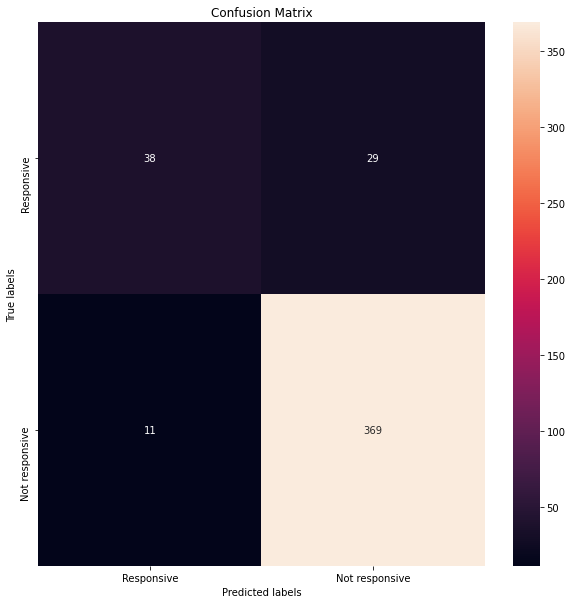

In [55]:
# confusion marix for the test data
cm = confusion_matrix(y_test, prediction,  labels=[1,0])

fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Responsive','Not responsive']); 
ax.yaxis.set_ticklabels(['Responsive','Not responsive']);